In [1]:
# 서두 : 지구온난화의 심각성
# 지구온난화의 원인
# 지구온난화를 해결할 수 있는 방안
import geopandas as gpd

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import font_manager,rc
%matplotlib inline

import matplotlib.font_manager as fm
font_dirs=['C:/Windows/Fonts/gulim.ttc']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [5]:
co2_gas = pd.read_csv("온실가스 인벤토리 배출량(CO2).csv", encoding='cp949')     # 이산화탄소
ch4_gas = pd.read_csv("온실가스 인벤토리 배출량(CH4).csv", encoding='cp949')     # 메탄 
hfcs_gas = pd.read_csv("온실가스 인벤토리 배출량(HFCs).csv", encoding='cp949')   # 수소불화탄소
n2o_gas = pd.read_csv("온실가스 인벤토리 배출량(N2O).csv", encoding='cp949')     # 아산화질소
pfcs_gas = pd.read_csv("온실가스 인벤토리 배출량(PFCs).csv", encoding='cp949')   # 육불화황
sf6_gas = pd.read_csv("온실가스 인벤토리 배출량(SF6).csv", encoding='cp949')     # 과불화탄소
total_gas = pd.read_csv("온실가스 인벤토리 배출량_총합.csv", encoding='cp949')

co2_gas.head(3)

,연도,총배출량,순배출량,1 에너지,1 에너지_A 연료연소,1 에너지_A 연료연소_1 에너지산업,1 에너지_A 연료연소_1 에너지산업_a 공공전기 및 열 생산,1 에너지_A 연료연소_1 에너지산업_b 석유정제,1 에너지_A 연료연소_1 에너지산업_c 고체연료 제조 및 기타 에너지 산업,1 에너지_A 연료연소_2 제조업 및 건설업,...,5 LULUCF_D 습지_3 습지에서 배수로 인한 Non-CO2 배출,5 LULUCF_D 습지_4 습지에서 바이오매스 연소에 의한 배출,5 LULUCF_E 정주지,5 LULUCF_F 기타토지,6 폐기물,6 폐기물_A 폐기물매립,6 폐기물_A 폐기물매립_1 관리형 매립,6 폐기물_A 폐기물매립_2 비관리형 매립,6 폐기물_C 폐기물소각,6 폐기물_D 기타
0,1990,252.00288,213.72767,231.68944,231.68944,48.18834,36.43922,11.28793,0.46119,76.13016,...,NaN,"NE,NO",NE,NE,1.39337,NaN,NaN,NaN,1.39337,NaN
1,1991,274.86180,240.87511,250.42778,250.42778,54.60637,42.52833,11.57736,0.50067,87.50849,...,NaN,"NE,NO",NE,NE,1.87214,NaN,NaN,NaN,1.87214,NaN
2,1992,299.74463,266.73086,272.45442,272.45442,62.16744,49.93235,11.64189,0.59320,97.35605,...,NaN,"NE,NO",NE,NE,2.32251,NaN,NaN,NaN,2.32251,NaN


In [3]:
# 데이터 추출 과정 --> 원하는 column만 새로 저장
# loc를 이용하여 특정 데이터만 추출
# loc[추출 원하는 row 수(:-->전체), 추출 원하는 column명]
# co2_gas_update = co2_gas.loc[:,["연도","총배출량","순배출량"]]

# DataFrame을 이용하여 특정 데이터만 추출
# DataFrame[["", "", ....]]

co2_gas = co2_gas[["연도","총배출량"]]
ch4_gas = ch4_gas[["연도","총배출량"]]
hfcs_gas = hfcs_gas[["연도","총배출량"]]
n2o_gas = n2o_gas[["연도","총배출량"]]
pfcs_gas = pfcs_gas[["연도","총배출량"]]
sf6_gas = sf6_gas[["연도","총배출량"]]
total_gas = total_gas[["연도","총배출량"]]
co2_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      29 non-null     int64  
 1   총배출량    29 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 592.0 bytes


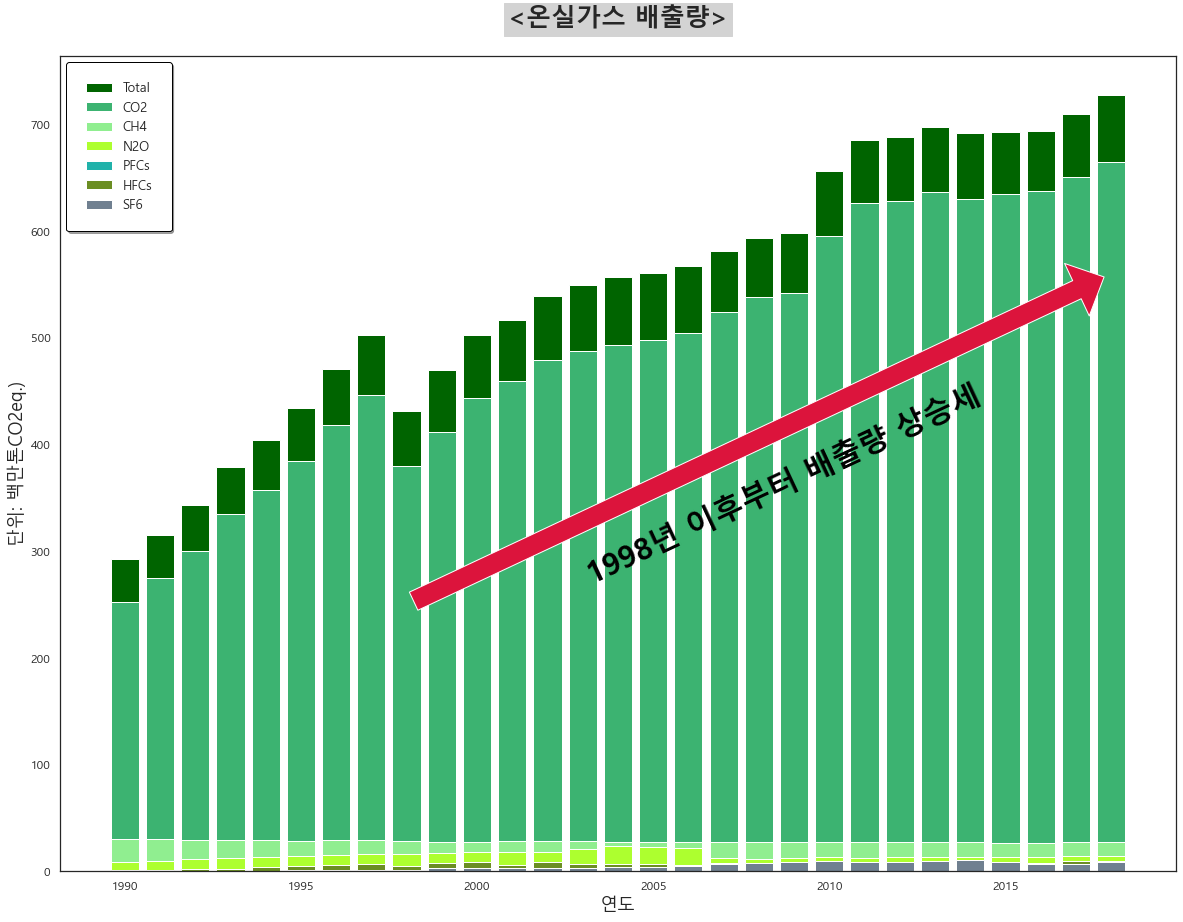

In [4]:
# 온실가스 총 배출량과 이산화탄소 배출량 그래프

plt.rcParams['figure.figsize'] = (20,15)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')   

plt.title("<온실가스 배출량>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')

co2_out = co2_gas['총배출량']
ch4_out = ch4_gas['총배출량']
n2o_out = n2o_gas['총배출량']
pfcs_out = pfcs_gas['총배출량']
hfcs_out = hfcs_gas['총배출량']
sf6_out = sf6_gas['총배출량']
total_out = total_gas['총배출량']

label = ['Total', 'CO2', 'CH4', 'N2O', 'PFCs', 'HFCs', 'SF6']
out = [total_out, co2_out, ch4_out, n2o_out, pfcs_out, hfcs_out, sf6_out]

p0 = plt.bar(total_gas['연도'], out[0], color='darkgreen')
p1 = plt.bar(co2_gas['연도'], out[1], color='mediumseagreen')
p2 = plt.bar(ch4_gas['연도'], out[2], color='lightgreen')
p3 = plt.bar(n2o_gas['연도'], out[3], color='greenyellow')
p4 = plt.bar(pfcs_gas['연도'], out[4], color='lightseagreen')
p5 = plt.bar(hfcs_gas['연도'], out[5], color='olivedrab')
p6 = plt.bar(sf6_gas['연도'], out[6], color='slategray')


plt.text(2003,270,"1998년 이후부터 배출량 상승세", fontsize=30, fontweight='bold', color='black', rotation=25)
plt.annotate("", xy=(2018,560), xytext=(1998,250), arrowprops=dict(facecolor='crimson',width=20,headwidth=58,headlength=30,shrink=0.01),
             size=20)
plt.xlabel('연도', fontsize=18)
plt.ylabel("단위: 백만톤CO2eq.)", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend((p0,p1,p2,p3,p4,p5,p6),label,fontsize=13, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white' )

plt.savefig("온실가스_총_배출량과_이산화탄소_총_배출량.png")
plt.show()

# 총 배출량의 대부분이 이산화탄소의 배출량임을 알 수 있다.

In [36]:
# 1990 ~ 2021년 전국 폭염일수


hot_day = pd.read_csv("폭염일수_년도별.csv", encoding='cp949')
tropical_night_day = pd.read_csv("열대야일수_년도별.csv", encoding='cp949')
tropical_night_day

,년,열대야일수,평균 최고기온(℃)
0,1990,6.5,18.4
1,1991,3.6,17.9
2,1992,4.9,18.1
3,1993,0.2,17.3
4,1994,16.8,19.1
5,1995,8.6,18.0
6,1996,5.8,17.9
7,1997,5.3,18.7
8,1998,5.8,18.9
9,1999,2.3,18.3


In [7]:
# 결측치 확인 
# 평균 최고기온에서 True(결측치 존재)
hot_day.isna().any()
tropical_night_day.isna().any()

print("폭염일수 결측치 여부:\n",hot_day.isna().any(),
      "\n\n열대야일수 결측치 여부:\n",tropical_night_day.isna().any())

# 결측치 제거
hot_day = hot_day.dropna()
tropical_night_day = tropical_night_day.dropna()
print("폭염일수 결측치 여부:\n",hot_day.isna().any(),
      "\n\n열대야일수 결측치 여부:\n",tropical_night_day.isna().any())


NameError: name 'hot_day' is not defined

In [30]:
# # total_day 데이터프레임 생성
# # columns : 연도, 폭염일수, 열대야일수

# total_day = pd.DataFrame()
# total_day['연도'] = hot_day['년']
# total_day['폭염일수'] = hot_day['폭염일수']
# total_day['열대야일수'] = tropical_night_day['열대야일수']
# total_day = total_day.set_index('연도')
# total_day.head(3)

In [78]:
# #  폭염일수와 열대야일수 막대그래프
# # 폭염일수와 열대야일수가 가장 많은 일수에 숫자 넣기

# plt.rcParams['figure.figsize']=(25,15)
# fig,ax = plt.subplots()
# sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')   

# label = ['폭염일수', '열대야일수']

# # line plot
# ax.plot(hot_day['년'], hot_day['폭염일수'], label='폭염일수', color='#F03737', linewidth=2.5, marker='o',ms=8)
# ax.plot(tropical_night_day['년'], tropical_night_day['열대야일수'], label='열대야일수', color='#5782E7', linewidth=2.5,
#        marker='s', ms=8)


# # bbox 지정 (dict 형태)

# bbox_style = dict(boxstyle='square', facecolor='peachpuff')


# # 폭염일수가 가장 많은 날만 marker 모양과 크기 다르게 하기

# max_day = max(hot_day['폭염일수'])

# for i,data in enumerate(hot_day['폭염일수']):
    
#     if data==max_day:
#         max_day_index = i
#         hot_day_maxYear = hot_day['년'][max_day_index]
#         ax.plot(hot_day['년'][max_day_index], hot_day['폭염일수'][max_day_index], color='red', marker="*", markersize=30)
#         ax.axvline(hot_day['년'][max_day_index],0,0.94,color='red',linestyle="--") # 수직선
#         ax.text(hot_day['년'][max_day_index]-0.8,-0.95,"2018년", fontsize=20, fontweight='bold',bbox=bbox_style)

# #         print(hot_day['년'][max_day_index])

# # 열대야일수가 가장 많은 날만 marker 모양과 크기 다르게 하기        

# max_tropical_day = max(tropical_night_day['열대야일수'])

# for i,data in enumerate(tropical_night_day['열대야일수']):
    
#     if data==max_tropical_day:
        
#         max_tropical_day_index = i
#         ax.plot(tropical_night_day['년'][max_tropical_day_index], tropical_night_day['열대야일수'][max_tropical_day_index],
#                 color='blue',
#                marker="*", ms=30)
#         ax.axvline(tropical_night_day['년'][max_tropical_day_index],0,0.53,color='blue',linestyle="--") # 수직선
#         ax.text(tropical_night_day['년'][max_tropical_day_index]-0.8,-0.95,"1994년", fontsize=20, fontweight='bold',bbox=bbox_style)
# #         print(tropical_night_day['년'][max_tropical_day_index])


        
        
# # 필요없는 축(오른쪽, 위) 숨기기
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# # text 및 화살표 그리기
# ax.annotate("폭염일수가\n가장 많은 년도", xy=(2018,31), xytext=(2013,32), arrowprops=dict(facecolor='orange', shrink=0.08,
#                                                                                width=5), ha='center',
#             va='top',size=23)

# ax.annotate("열대야일수가\n가장 많은 년도", xy=(1994,17.5), xytext=(1997,19.9), arrowprops=dict(facecolor='orange',
#                                                                                     shrink=1, width=5), ha='center',
#             va='top',size=23)

# # 기존 y축 범위 저장
# ylim = ax.get_ylim() 

# # y축 눈금을 리스트로 저장
# yticks = list(ax.get_yticks())


# for y in yticks:
#     ax.axhline(y, linestyle=(0,(7,2)), color='grey', alpha=0.5)  # 눈금선(수평선) 생성
#     # (0,(5,2))의미 : 5는 눈금선의 길이(숫자가 길어질수록 눈금선의 길이도 길어짐) 2는 공백의 길이. 0은 패턴의 시작 위치를 알려주는 상수
#     # 0이므로 아무것도 잘라내지 않고 바로 눈금선 시작

# ax.set_yticks(yticks) # y축 눈금을 새롭게 세팅
# ax.set_ylim(ylim) # y축 범위 세팅(기존과 동일)

# plt.title("<년도별 폭염 및 열대야일수>", fontsize=25, pad=33, fontweight='bold', backgroundcolor='lightgrey')
# plt.xlabel('연도',fontsize=22)
# plt.ylabel('일수',fontsize=22)
# plt.xticks(fontsize=18) # x축 범례
# plt.yticks(fontsize=18)

# ax.legend(loc='upper center', shadow=True, fancybox=True, borderpad=2, fontsize=18,edgecolor='black', facecolor='white')

# plt.savefig("년도별_폭염_및_열대야일수.png")
# plt.show()

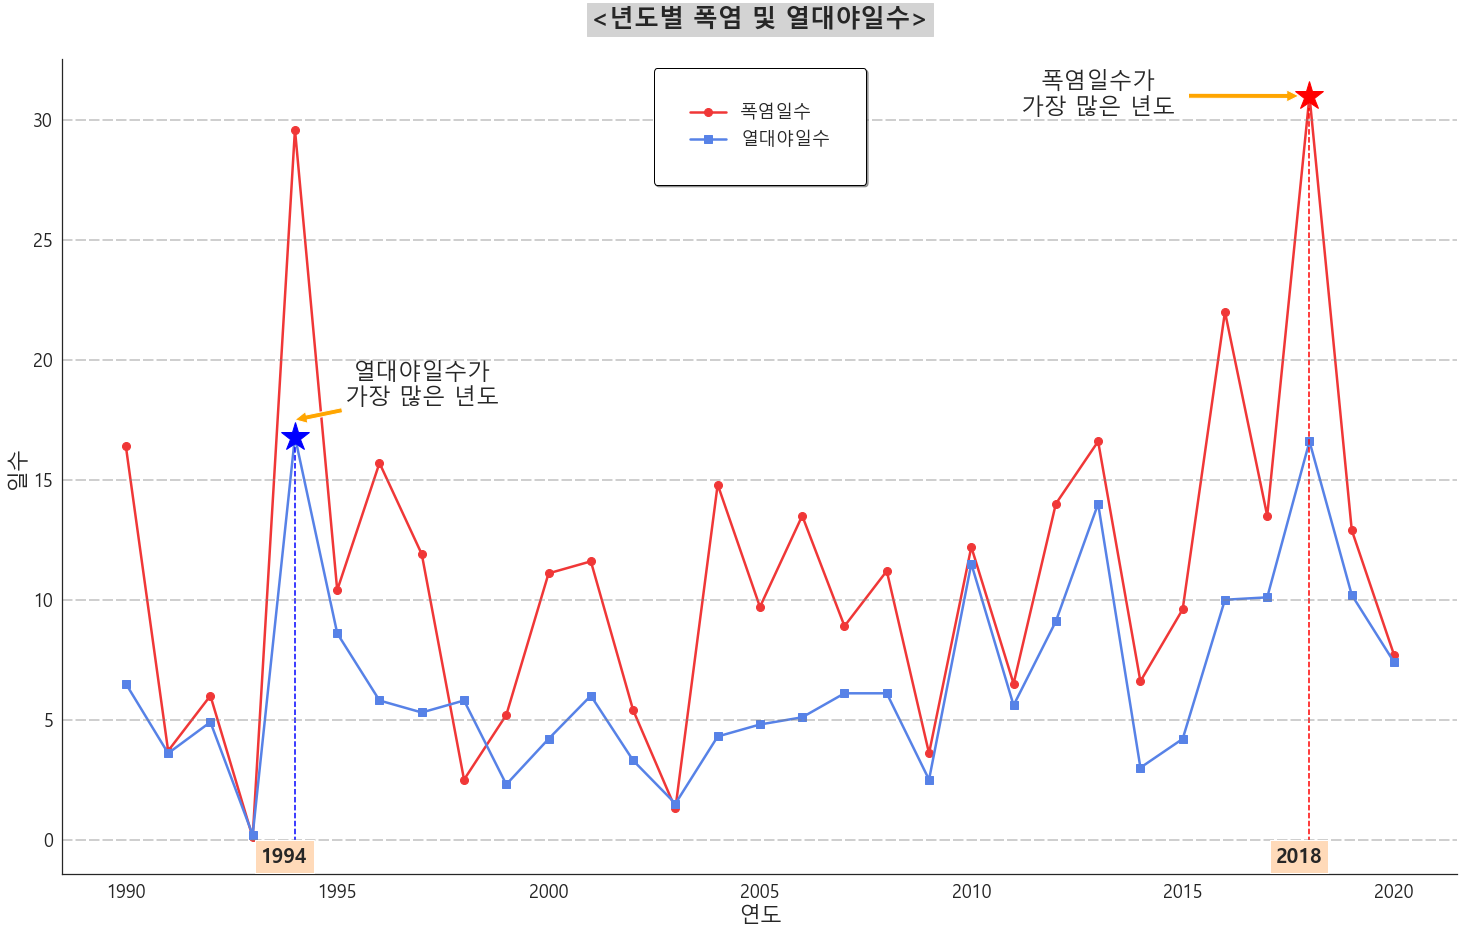

In [35]:
plt.rcParams['figure.figsize']=(25,15)
fig,ax = plt.subplots()
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')   



label = ['폭염일수', '열대야일수']

# line plot
ax.plot(hot_day['년'], hot_day['폭염일수'], label='폭염일수', color='#F03737', linewidth=2.5, marker='o',ms=8)
ax.plot(tropical_night_day['년'], tropical_night_day['열대야일수'], label='열대야일수',
        color='#5782E7', linewidth=2.5, marker='s', ms=8)

bbox_style = dict(boxstyle='square', facecolor='peachpuff')

# 폭염일수가 가장 많은 날만 marker 모양과 크기 다르게 하기

max_day = max(hot_day['폭염일수'])

for i,data in enumerate(hot_day['폭염일수']):
    
    if data==max_day:
        max_day_index = i
        hot_day_maxYear = hot_day['년'][max_day_index]
        ax.plot(hot_day_maxYear, hot_day['폭염일수'][max_day_index], color='red',
                marker="*", markersize=30)
        ax.axvline(hot_day_maxYear,0,0.94,color='red',linestyle="--") 
        ax.text(hot_day_maxYear-0.8,-0.95,hot_day_maxYear, fontsize=20, 
                fontweight='bold',bbox=bbox_style)
        
# 열대야일수가 가장 많은 날만 marker 모양과 크기 다르게 하기        

max_tropical_day = max(tropical_night_day['열대야일수'])

for i,data in enumerate(tropical_night_day['열대야일수']):
    
    if data==max_tropical_day:      
        max_tropical_day_index = i
        tropical_night_day_maxYear = tropical_night_day['년'][max_tropical_day_index]
        ax.plot(tropical_night_day_maxYear, 
                tropical_night_day['열대야일수'][max_tropical_day_index],color='blue',
               marker="*", ms=30)
        ax.axvline(tropical_night_day_maxYear,0,0.53,color='blue',linestyle="--") 
        ax.text(tropical_night_day_maxYear-0.8,-0.95,tropical_night_day_maxYear, 
                fontsize=20,fontweight='bold',bbox=bbox_style)
        
# 필요없는 축(오른쪽, 위) 숨기기
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# text 및 화살표 그리기
ax.annotate("폭염일수가\n가장 많은 년도", xy=(2018,31), xytext=(2013,32), arrowprops=dict(facecolor='orange', shrink=0.08,
                                                                               width=5), ha='center',va='top',size=23)

ax.annotate("열대야일수가\n가장 많은 년도", xy=(1994,17.5), xytext=(1997,19.9), arrowprops=dict(facecolor='orange',
                                                                                    shrink=1, width=5), ha='center',va='top',size=23)

# 기존 y축 범위 저장
ylim = ax.get_ylim() 

# y축 눈금을 리스트로 저장
yticks = list(ax.get_yticks())

for y in yticks:
    ax.axhline(y, linestyle=(0,(7,2)), color='grey', alpha=0.5) 
ax.set_yticks(yticks) 
ax.set_ylim(ylim) 

plt.title("<년도별 폭염 및 열대야일수>", fontsize=25, pad=33, fontweight='bold', backgroundcolor='lightgrey')
plt.xlabel('연도',fontsize=22)
plt.ylabel('일수',fontsize=22)
plt.xticks(fontsize=18) 
plt.yticks(fontsize=18)
ax.legend(loc='upper center', shadow=True, fancybox=True, borderpad=2, fontsize=18,edgecolor='black', facecolor='white')

plt.savefig("년도별_폭염_및_열대야일수.png")
plt.show()

In [37]:
# 폐기물 발생량 (폐기물종류별 일평균 발생량)
# 출처:	환경부, 「전국 폐기물 발생 및 처리현황」, 「지정폐기물 발생 및 처리현황」
# 자료 : 환경부, 「전국 폐기물 발생 및 처리현황」, 「지정폐기물 발생 및 처리현황」 각 연도
# 생활폐기물은 가정생활폐기물, 사업장생활계폐기물, 공사장생활계폐기물을 포함한 수치임

trash_amount = pd.read_csv("폐기물발생량.csv",encoding='cp949', thousands=",")   
#thousands ==> 숫자 콤마 부분 제거
trash_amount.head(3)


,종류,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,총계,180573,195275,190254,219217,234283,261032,277533,303029,311666,...,374642,383333,394496,393116,401658,418214,429128,429531,446102,497238
1,생활폐기물,49925,47895,44583,45614,46438,48499,49902,50736,50007,...,49159,48934,48990,48728,49915,51247,53772,53490,56035,57961
2,사업장배출시설계폐기물,96984,93528,92713,103893,101453,95908,99505,98891,105018,...,137875,137961,146390,148443,153189,155305,162129,164874,167727,202619


In [40]:
# column명 변경
trash_amount = trash_amount.rename(columns={'종류':"연도"})
# 행과 열 바꾸기
trash_amount_new = trash_amount.transpose()
trash_amount_new.head(3)


# trash_amount_new = trash_amount_new.drop(index='연도',axis=0,inplace=True)
# trash_amount_new.index  # 연도, 2011...2019


,0,1,2,3,4
연도,총계,생활폐기물,사업장배출시설계폐기물,건설폐기물,지정폐기물
1996,180573,49925,96984,28425,5239
1997,195275,47895,93528,47777,6075


In [41]:
 # 첫번째 행을 column으로 지정
trash_amount_newColumn = trash_amount_new.rename(columns=trash_amount_new.iloc[0])
#첫번째 행 삭제
trash_amount_newColumn2 = trash_amount_newColumn.drop(trash_amount_newColumn.index[0])  
trash_amount_newColumn2.head(3)

,총계,생활폐기물,사업장배출시설계폐기물,건설폐기물,지정폐기물
1996,180573,49925,96984,28425,5239
1997,195275,47895,93528,47777,6075
1998,190254,44583,92713,47693,5265


In [43]:
# year_list = [1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

year_list=[]
for i in range(1996,2020):
    year_list.append(i)
trash_amount_newColumn2['연도'] = year_list



In [44]:
trash_amount_newColumn2 = trash_amount_newColumn2.set_index('연도')


In [45]:
trash_amount_newColumn2.dtypes  
# type 확인
# 현재는 object형

trash_amount_newColumn2 = trash_amount_newColumn2.astype(int)
# int형 변환

trash_amount_newColumn2.dtypes  
# int형 변환

# trash_amount_newColumn2['총계'] = trash_amount_newColumn2['총계'].astype(int)
# trash_amount_newColumn2['생활폐기물'] = trash_amount_newColumn2['생활폐기물'].astype(int)
# trash_amount_newColumn2['사업장배출시설계폐기물'] = trash_amount_newColumn2['사업장배출시설계폐기물'].astype(int)
# trash_amount_newColumn2['건설폐기물'] = trash_amount_newColumn2['건설폐기물'].astype(int)
# trash_amount_newColumn2['지정폐기물'] = trash_amount_newColumn2['지정폐기물'].astype(int)


총계             int32
생활폐기물          int32
사업장배출시설계폐기물    int32
건설폐기물          int32
지정폐기물          int32
dtype: object

In [46]:
# trash_amount_newColumn2['지정폐기물'].iloc[-1]
trash_amount_newColumn2['총계'].iloc[-1]

497238

In [47]:
trash_amount_newColumn2

,총계,생활폐기물,사업장배출시설계폐기물,건설폐기물,지정폐기물
연도,,,,,
1996,180573,49925,96984,28425,5239
1997,195275,47895,93528,47777,6075
1998,190254,44583,92713,47693,5265
1999,219217,45614,103893,62221,7489
2000,234283,46438,101453,78777,7615
2001,261032,48499,95908,108520,8105
2002,277533,49902,99505,120141,7985
2003,303029,50736,98891,145420,7982
2004,311666,50007,105018,148489,8152


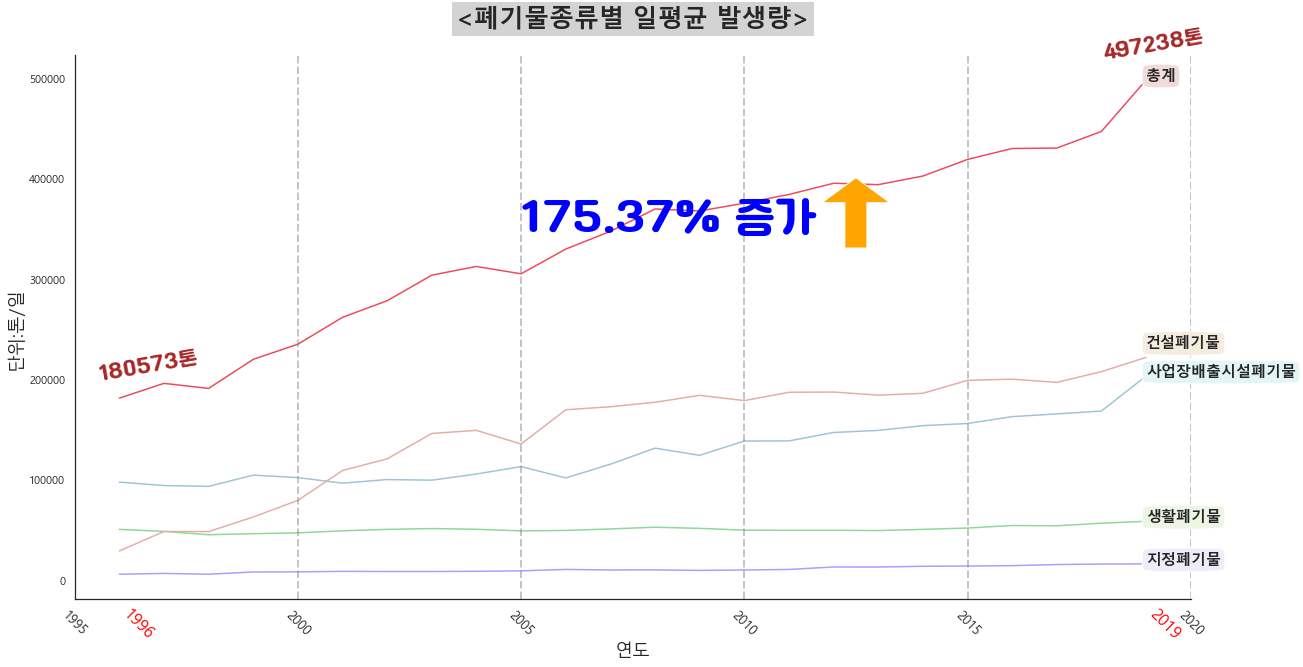

In [54]:
# 그래프 그리기

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')


fig,ax = plt.subplots()
ax.plot(trash_amount_newColumn2.index, trash_amount_newColumn2['총계'], color='#EE4A5D')
ax.plot(trash_amount_newColumn2.index, trash_amount_newColumn2['생활폐기물'], color='#8CD998')
ax.plot(trash_amount_newColumn2.index, trash_amount_newColumn2['사업장배출시설계폐기물'], color='#9EC5D5')
ax.plot(trash_amount_newColumn2.index, trash_amount_newColumn2['건설폐기물'], color='#E2AFA7')
ax.plot(trash_amount_newColumn2.index, trash_amount_newColumn2['지정폐기물'], color='#A9A0FC')
 
# 눈금선

xlim = ax.get_xlim()  # 기존 y축 범위 가져오기
xticks = list(ax.get_xticks())  # 기존 y축 눈금을 리스트 형태로 가져오기

for x in xticks:
    
    ax.axvline(x,linestyle=(0,(5,2)), color='grey', alpha=0.6)
    
ax.set_xticks(xticks)
ax.set_xlim(xlim)

box_fig = dict(boxstyle='round4', facecolor='#F2DCD9')   # 총계
box_fig2 = dict(boxstyle='round4', facecolor='#EDF6E4')  # 생활폐기물
box_fig3 = dict(boxstyle='round4', facecolor='#E4F5F6')  # 사업장배출시설계폐기물
box_fig4 = dict(boxstyle='round4', facecolor='#F5ECE0')  # 건설폐기물
box_fig5 = dict(boxstyle='round4', facecolor='#ECEDF9')  # 지정폐기물

# text 함수 이용하여 line 별로 label 새기기
ax.text(trash_amount_newColumn2.index[-1],trash_amount_newColumn2['총계'].iloc[-1]+0.1,"총계", font='Malgun Gothic', fontweight='bold',
        fontsize=15, bbox=box_fig)
ax.text(trash_amount_newColumn2.index[-1],trash_amount_newColumn2['생활폐기물'].iloc[-1]+0.1,"생활폐기물", font='Malgun Gothic', fontweight='bold',
        fontsize=15, bbox=box_fig2)
ax.text(trash_amount_newColumn2.index[-1],trash_amount_newColumn2['사업장배출시설계폐기물'].iloc[-1]-1,"사업장배출시설폐기물", 
        font='Malgun Gothic', fontweight='bold',fontsize=15, bbox=box_fig3)
ax.text(trash_amount_newColumn2.index[-1],trash_amount_newColumn2['건설폐기물'].iloc[-1]+10000,"건설폐기물", 
        font='Malgun Gothic', fontweight='bold',fontsize=15, bbox=box_fig4)
ax.text(trash_amount_newColumn2.index[-1],trash_amount_newColumn2['지정폐기물'].iloc[-1]+0.1,"지정폐기물", font='Malgun Gothic', fontweight='bold',
        fontsize=15, bbox=box_fig5)


first_year = trash_amount_newColumn2['지정폐기물'].index[0]     # 1996년
last_year = trash_amount_newColumn2['지정폐기물'].index[-1]    # 2019년

# first year, last year에 해당하는 text
# first_year
ax.text(trash_amount_newColumn2.index[0], trash_amount_newColumn2['지정폐기물'].index[-1]-60000,first_year,fontsize=16, rotation=-45, color='red')
# last_year
ax.text(trash_amount_newColumn2.index[-1], trash_amount_newColumn2['지정폐기물'].index[-1]-60000,last_year,fontsize=16, rotation=-45, color='red')


# 총계 
total_trash_amount_min = trash_amount_newColumn2['총계'].iloc[0]   # 총계: 폐기물 발생량 최소값
total_trash_amount_max =  trash_amount_newColumn2['총계'].iloc[-1] # 총계: 폐기물 발생량 최대값
# print(total_trash_amount_min,total_trash_amount_max)

# 폐기물 발생량 최소값
ax.text(trash_amount_newColumn2.index[0]-0.5, total_trash_amount_min+20000, "{}톤".format(total_trash_amount_min), font='Cafe24 Ssurround',fontsize=20, rotation=10, color='brown')
# 폐기물 발생량 최대값
ax.text(trash_amount_newColumn2.index[-1]-1, total_trash_amount_max+23000, "{}톤".format(total_trash_amount_max), font='Cafe24 Ssurround',fontsize=20, rotation=10, color='brown')

# 폐기물 발생량 증감율 (총계)
percentage_total_minmax = ((total_trash_amount_max-total_trash_amount_min)/total_trash_amount_min)*100
percentage_total_minmax = round(percentage_total_minmax,2)

ax.text(2005,350000,"{}% 증가".format(percentage_total_minmax),font='Cafe24 Ssurround',fontsize=43, color='blue' )
# print(percentage_total_minmax) --> 175.37%

# 화살표

ax.annotate("", xy=(2012.5,400000), xytext=(2012.5,330000), arrowprops=dict(facecolor='orange', headwidth=68, headlength=25,width=22))

# 필요없는 축 지우기
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel('연도',fontsize=18)
plt.ylabel('단위:톤/일',fontsize=18)
plt.title('<폐기물종류별 일평균 발생량>', fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.xticks(fontsize=13,rotation=-45)
plt.xticks(fontsize=13)
plt.xlim(1995,2020)

plt.savefig("폐기물종류별 일평균 발생량.png")

plt.show()



In [89]:
# new_renewable_energy_permission = pd.read_csv("서울시 신재생에너지 허가 및 사업개시.csv", encoding='cp949')
# new_renewable_energy_permission.head(3)

In [84]:
plant_trees = pd.read_csv("서울시 3천만그루 나무심기.csv", encoding='cp949')
plant_trees

,년월,기관부서코드,기관부서,사업 대분류 코드,사업 대분류,사업 중분류 코드,사업 중분류,세부사업명,기타지역,면적(m2),...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,201609,10005,광진구 자치구 공원녹지과,400,생활밀착형 녹지공간 확충 및 도시숲 보존,410,동네뒷산 공원 조성,2016년 아차산 둘레길 정비사업,NaN,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201807,10006,동대문구 자치구 공원녹지과,400,생활밀착형 녹지공간 확충 및 도시숲 보존,409,시공원 보수정비,2018년 배봉산 근린공원(정상부) 조성공사,NaN,400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201509,10016,강서구 자치구 공원녹지과,200,미세먼지 민감군 보호를 위한 특화사업,201,에코스쿨 조성,2015년 에코스쿨 조성공사 2,강서구 가양동 1468,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201412,10012,은평구 자치구 공원녹지과,500,시민과 함께하는 민관협력 사업,504,공동체정원 조성,2014년 꽃나무 심기 주민제안사업(보조금),NaN,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201412,10012,은평구 자치구 공원녹지과,100,식재 및 녹화방식 개선과 효과적 나무심기,101,가로수 생육환경 개선,2014년 가로수 생육환경 개선사업,NaN,1357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6510,201509,10007,중랑구 자치구 공원녹지과,400,생활밀착형 녹지공간 확충 및 도시숲 보존,409,시공원 보수정비,2015년 시공원보수정비사업,NaN,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6511,201612,10007,중랑구 자치구 공원녹지과,900,기타,901,택지개발 정비사업 등,2016년 근교산 등산로 정비사업,NaN,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6512,201907,30029,한강사업본부 사업소 생태환경과,300,대규모 유휴공간을 활용한 다양한 녹지공간 확충,305,한강숲 조성,2019년 양화 완충숲 조성,NaN,800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6513,201611,10001,종로구 자치구 공원녹지과,400,생활밀착형 녹지공간 확충 및 도시숲 보존,409,시공원 보수정비,2016년 시공원 보수정비 공사(삼청 와룡공원),명륜3가 산2-14,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# 특정 column들만 새로운 dataFrame에 저장
new_plant_trees = pd.DataFrame()
new_plant_trees['년월'] = plant_trees['년월']
new_plant_trees['교목(합계)'] = plant_trees['교목(합계)']
new_plant_trees['관목(합계)'] = plant_trees['관목(합계)']
new_plant_trees['초화류'] = plant_trees['초화류']
new_plant_trees['덩굴식물'] = plant_trees['덩굴식물']
new_plant_trees['자치구'] = plant_trees['자치구']
new_plant_trees

,년월,교목(합계),관목(합계),초화류,덩굴식물,자치구
0,201609,0,590,0,0,광진구
1,201807,22,3370,0,0,동대문구
2,201509,12,680,8711,0,강서구
3,201412,50,1137,2344,0,은평구
4,201412,103,21305,680,0,은평구
...,...,...,...,...,...,...
6510,201509,0,2800,2000,0,중랑구
6511,201612,0,20022,0,0,중랑구
6512,201907,513,2250,2000,0,영등포구
6513,201611,0,710,9480,0,종로구


In [87]:
# 결측치 확인
new_plant_trees.isnull().sum()  
# 결측치 대체
new_plant_trees = new_plant_trees.fillna('기타')
# 결측치 재확인
new_plant_trees.isnull().sum()
new_plant_trees[new_plant_trees['자치구']=='기타']  # 결측치가 '기타'로 변경되었음을 알 수 있다.

,년월,교목(합계),관목(합계),초화류,덩굴식물,자치구
9,201904,1,0,0,0,기타
30,201911,0,7380,0,0,기타
39,201906,0,4345,0,0,기타
42,201906,0,3805,0,6600,기타
43,201905,4,28690,0,0,기타
44,201906,0,5300,0,0,기타
45,201906,5,0,0,0,기타
46,201904,10,2094,0,0,기타
56,201907,5,1850,0,0,기타
59,201909,348,9230,0,0,기타


In [88]:
# '년월'을 기준으로 정렬
new_plant_trees = new_plant_trees.sort_values(by='년월', ascending=True)


In [89]:
# '년월' int형에서 object형으로 변환
# 년월을 년과 월로 쪼개기 위해서 object로 변환하였음.
new_plant_trees['년월'] = list(map(str,new_plant_trees['년월']))



In [90]:
# 년월을 각각 year, month에 저장
year = []
month = []

for data in new_plant_trees['년월']:
    year.append(data[0:4])
    month.append(data[4:6])
    
new_plant_trees['year'] = year
new_plant_trees['month'] = month
new_plant_trees['year'].astype('int64')
new_plant_trees['month'].astype('int64')


1049     1
6496     1
4017     1
2739     2
2839     2
        ..
5798    11
5724    11
5979    11
6007    12
5681    12
Name: month, Length: 6515, dtype: int64

In [115]:
# 각 년도별로 교목, 관목, 초화류, 덩굴식물 합계 구하기

sum_2014 = 0
sum_2015 = 0
sum_2016 = 0
sum_2017 = 0
sum_2018 = 0
sum_2019 = 0
sum_2020 = 0
sum_2021 = 0

for data in new_plant_trees.values:
    if data[6] == '2014':
        sum_2014 += (data[1] + data[2] + data[3] +data[4])
    elif data[6] == '2015':
        sum_2015 += (data[1] + data[2] + data[3] +data[4])     
    elif data[6] == '2016':
        sum_2016 += (data[1] + data[2] + data[3] +data[4])  
    elif data[6] == '2017':
        sum_2017 += (data[1] + data[2] + data[3] +data[4])  
    elif data[6] == '2018':
        sum_2018 += (data[1] + data[2] + data[3] +data[4])  
    elif data[6] == '2019':
        sum_2019 += (data[1] + data[2] + data[3] +data[4])          
    elif data[6] == '2020':
        sum_2020 += (data[1] + data[2] + data[3] +data[4])  
    elif data[6] == '2021':
        sum_2021 += (data[1] + data[2] + data[3] +data[4]) 

# 년도 생성        
year_list = []
for year in range(2014,2022):
    year_list.append(year)
    
tree_sum_all = []
tree_sum_all = [sum_2014,sum_2015,sum_2016,sum_2017,sum_2018,sum_2019,sum_2020,sum_2021]

year_plants_sum = pd.DataFrame({'연도':year_list, '연도별 심은 나무의 총 그루':tree_sum_all})
year_plants_sum

,연도,연도별 심은 나무의 총 그루
0,2014,12080466
1,2015,8231683
2,2016,8866341
3,2017,7082005
4,2018,4298774
5,2019,15106893
6,2020,10854818
7,2021,4020380


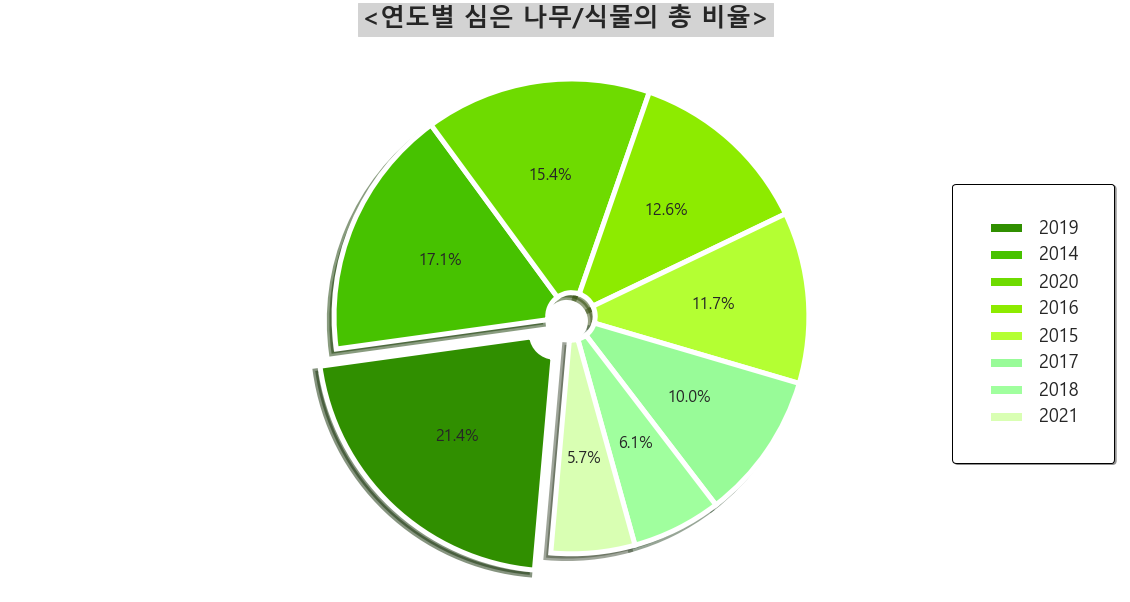

In [132]:
# 년도별 pie chart

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
colors = ['#308F00','#47C200','#6EDB00','#8DEB00','#B4FF33','palegreen','#A0FF9E','#D9FFB3'] 
explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
wedgeprops = {'width':0.9, 'edgecolor':'w', 'linewidth':5}  

year_plants_sum=year_plants_sum.sort_values(by='연도별 심은 나무의 총 그루',ascending=False)

plt.pie(year_plants_sum['연도별 심은 나무의 총 그루'], autopct='%1.1f%%',startangle=-95, counterclock=False, 
        colors=colors,explode=explode,wedgeprops=wedgeprops, shadow=True,textprops={'fontsize':16})
plt.axis('equal')
plt.legend(year_plants_sum['연도'],loc='right', shadow=True, fancybox=True, borderpad=2,fontsize=18,
          edgecolor='black', facecolor='white')
plt.title("<연도별 심은 나무/식물의 총 비율>", fontsize=25, pad=25, fontweight='bold', backgroundcolor='lightgrey')
plt.savefig("연도별 심은 나무_식물의 총 비율.png")
plt.show()

In [109]:
# # 각 년도별로 교목, 관목, 초화류, 덩굴식물 합계 구하기
# # tree 교목 Shrub 관목 cho 초화류 vine 덩굴식물

# tree_2014_sum = 0
# shrub_2014_sum = 0
# cho_2014_sum = 0
# vine_2014_sum = 0

# tree_2015_sum = 0
# shrub_2015_sum = 0
# cho_2015_sum = 0
# vine_2015_sum = 0

# tree_2016_sum = 0
# shrub_2016_sum = 0
# cho_2016_sum = 0
# vine_2016_sum = 0

# tree_2017_sum = 0
# shrub_2017_sum = 0
# cho_2017_sum = 0
# vine_2017_sum = 0

# tree_2018_sum = 0
# shrub_2018_sum = 0
# cho_2018_sum = 0
# vine_2018_sum = 0

# tree_2019_sum = 0
# shrub_2019_sum = 0
# cho_2019_sum = 0
# vine_2019_sum = 0

# tree_2020_sum = 0
# shrub_2020_sum = 0
# cho_2020_sum = 0
# vine_2020_sum = 0

# tree_2021_sum = 0
# shrub_2021_sum = 0
# cho_2021_sum = 0
# vine_2021_sum = 0

# year_list = []

# for year in range(2014,2022):   # 년도 생성
#     year_list.append(year)
    
# for data in new_plant_trees.values:  # 년도별 나무별 값 생성

#      if data[6] == '2014':

#         tree_2014_sum += data[1]
#         shrub_2014_sum += data[2]
#         cho_2014_sum += data[3]
#         vine_2014_sum += data[4]
   
#      elif data[6] == '2015':

#         tree_2015_sum += data[1]
#         shrub_2015_sum += data[2]
#         cho_2015_sum += data[3]
#         vine_2015_sum += data[4]
        
# print(tree_2015_sum+shrub_2015_sum+cho_2015_sum+vine_2015_sum)
      
# #      elif data[6] == '2016':

# #         tree_2016_sum += data[1]
# #         shrub_2016_sum += data[2]
# #         cho_2016_sum += data[3]
# #         vine_2016_sum += data[4]  
        
# #      elif data[6] == '2017':

# #         tree_2017_sum += data[1]
# #         shrub_2017_sum += data[2]
# #         cho_2017_sum += data[3]
# #         vine_2017_sum += data[4]
        
# #      elif data[6] == '2018':

# #         tree_2018_sum += data[1]
# #         shrub_2018_sum += data[2]
# #         cho_2018_sum += data[3]
# #         vine_2018_sum += data[4]  
        
# #      elif data[6] == '2019':

# #         tree_2019_sum += data[1]
# #         shrub_2019_sum += data[2]
# #         cho_2019_sum += data[3]
# #         vine_2019_sum += data[4]               
       
# #      elif data[6] == '2020':

# #         tree_2020_sum += data[1]
# #         shrub_2020_sum += data[2]
# #         cho_2020_sum += data[3]
# #         vine_2020_sum += data[4]
                    
# #      elif data[6] == '2021':

# #         tree_2021_sum += data[1]
# #         shrub_2021_sum += data[2]
# #         cho_2021_sum += data[3]
# #         vine_2021_sum += data[4]


# # tree_sum = [tree_2014_sum,tree_2015_sum,tree_2016_sum,tree_2017_sum,tree_2018_sum,tree_2019_sum,tree_2020_sum,tree_2021_sum]
# # shrub_sum = [shrub_2014_sum,shrub_2015_sum,shrub_2016_sum,shrub_2017_sum,shrub_2018_sum,shrub_2019_sum,shrub_2020_sum,shrub_2021_sum]
# # cho_sum = [cho_2014_sum,cho_2015_sum,cho_2016_sum,cho_2017_sum,cho_2018_sum,cho_2019_sum,cho_2020_sum,cho_2021_sum]
# # vine_sum =[vine_2014_sum,vine_2015_sum,vine_2016_sum,vine_2017_sum,vine_2018_sum,vine_2019_sum,vine_2020_sum,vine_2021_sum]

# # # 새로운 DF 생성
# # year_plants_sum = pd.DataFrame({'연도':year_list, '교목':tree_sum, '관목':shrub_sum, '초화류':cho_sum, '덩굴식물':vine_sum})







In [104]:
# # 년도별 교목별 pie chart

# plt.rcParams['figure.figsize']=(20,10)
# sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
# colors = ['lightcoral', 'lightsalmon','lightyellow', 'lightgreen', 'lightcyan', 'lightblue', 'lightsteelblue', 'lightpink']   #차트 색상
# explode = [0.1, 0, 0, 0, 0, 0, 0, 0]

# year_plants_sum=year_plants_sum.sort_values(by='교목',ascending=False)

# plt.pie(year_plants_sum['교목'], autopct='%1.1f%%',startangle=-95, counterclock=False, 
#         colors=colors,explode=explode, shadow=True,textprops={'fontsize':16})
# plt.axis('equal')
# plt.legend(year_plants_sum['연도'],loc='right', shadow=True, fancybox=True, borderpad=2,fontsize=18,
#           edgecolor='black', facecolor='white')
# plt.title("<전체 교목 수 대비 년도별 교목 수 비율>", fontsize=25, pad=25, fontweight='bold', backgroundcolor='lightgrey')
# plt.savefig("전체 교목 수 대비 년도별 교목 수 비율.png")
# plt.show()

In [105]:
# # 년도별 관목별 pie chart

# plt.rcParams['figure.figsize']=(20,10)
# sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
# colors = ['#A8E4FF','#7AD7FF','#4DBEFF','#24A4FF','#2491FF','#3D81FF','#3C56B4','#3D6CB8']
# explode = [0.04, 0, 0, 0, 0, 0, 0, 0]
# wedgeprops = {'width':0.8, 'edgecolor':'white', 'linewidth':5}  

# year_plants_sum=year_plants_sum.sort_values(by='관목',ascending=False)

# plt.pie(year_plants_sum['관목'], autopct='%1.1f%%',startangle=-95, counterclock=False, 
#         colors=colors,explode=explode, wedgeprops=wedgeprops, textprops={'fontsize':16})
# plt.axis('equal')
# plt.legend(year_plants_sum['연도'],loc='right', shadow=True, fancybox=True, borderpad=2,fontsize=18)
# plt.title("<전체 관목 수 대비 년도별 관목 수 비율>", fontsize=25,pad=25, fontweight='bold', backgroundcolor='lightgrey')
# plt.savefig("전체 관목 수 대비 년도별 관목 수 비율.png")

In [107]:
# # 년도별 초화류별 pie chart

# plt.rcParams['figure.figsize']=(20,10)
# sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
# colors = ['#B83D83','#C34BA9','#CD6ACA','#D071B8','#DB94CB','#ECC6E7','#FFD6ED','#FFE5EB']   #차트 색상
# explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
# wedgeprops = {'width':0.3, 'edgecolor':'w', 'linewidth':5}  

# year_plants_sum=year_plants_sum.sort_values(by='초화류',ascending=False)

# plt.pie(year_plants_sum['초화류'], autopct='%1.1f%%',startangle=-155, counterclock=False, 
#         colors=colors,explode=explode, wedgeprops=wedgeprops, shadow=True, textprops={'fontsize':16})
# plt.axis('equal')
# plt.legend(year_plants_sum['연도'],loc='right', fancybox=True, borderpad=2,fontsize=18)
# plt.title("<전체 초화류 수 대비 년도별 초화류 수 비율>", fontsize=25,pad=25, fontweight='bold', backgroundcolor='lightgrey')
# plt.savefig("전체 초화류 수 대비 년도별 초화류 수 비율.png")

In [108]:
# # 년도별 덩굴식물별 pie chart

# plt.rcParams['figure.figsize']=(20,10)
# sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
# colors = ['#308F00','#47C200','#6EDB00','#8DEB00','#B4FF33','palegreen','#A0FF9E','#D9FFB3']   #차트 색상
# explode = [0.04, 0, 0, 0.04, 0.12, 0.2, 0.28, 0.35]

# year_plants_sum=year_plants_sum.sort_values(by='덩굴식물',ascending=False)

# plt.pie(year_plants_sum['덩굴식물'],autopct='%1.1f%%',startangle=-95, counterclock=False, 
#         colors=colors,explode=explode, textprops={'fontsize':16})
# plt.axis('equal')
# plt.legend(year_plants_sum['연도'],loc='right', shadow=True, fancybox=True, borderpad=2,fontsize=18)
# plt.title("<전체 덩굴식물 수 대비 년도별 덩굴식물 수 비율>", fontsize=25,pad=25, fontweight='bold', backgroundcolor='lightgrey')
# plt.savefig("전체 덩굴식물 수 대비 년도별 덩굴식물 수 비율.png")

In [133]:
set(new_plant_trees['자치구'])  # 총 27개

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '과천시',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '기타',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구'}

In [25]:
# 자치구별 교목+관목+초화류+덩굴식물 수
# 자치구별 dataframe 생성 {'자치구':자치구명들, '전체 식물 합계':~}
# if new_plant_trees['자치구']=='구로구'이면
# guro_sum = new_plant_trees['교목']+new_plant_trees['관목']+new_plant_trees['초화류']+new_plant_trees['덩굴식물']

In [134]:
gangnam = 0
gangdong = 0
gangbuk = 0
gangseo = 0
gwacheon = 0
gwanak = 0
gwangjin = 0
guro = 0
geumcheon = 0
nowon = 0
dobong = 0
dongdaemun = 0
dongjak = 0
mapo = 0
seodaemun = 0
seocho = 0
seongdong = 0
seongbuk = 0
songpa = 0
yangcheon = 0
yeongdeungpo = 0
yongsan = 0
eunpyeong = 0
jongro = 0
junggu = 0
jungnang = 0
etc = 0

seoul_list = []

for seoul in set(new_plant_trees['자치구']):
    seoul_list.append(seoul)

for data in new_plant_trees.values:
    if data[5] == '강남구':
        gangnam += data[1]+data[2]+data[3]+data[4]
    if data[5] == '강동구':
        gangdong += data[1]+data[2]+data[3]+data[4]
    if data[5] == '강북구':
        gangbuk += data[1]+data[2]+data[3]+data[4]
    if data[5] == '강서구':
        gangseo += data[1]+data[2]+data[3]+data[4]
    if data[5] == '과천시':        
        gwacheon += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '관악구':        
        gwanak += data[1]+data[2]+data[3]+data[4]          
    if data[5] == '광진구':        
        gwangjin += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '구로구':        
        guro += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '금천구':        
        geumcheon += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '노원구':        
        nowon += data[1]+data[2]+data[3]+data[4]
    if data[5] == '도봉구':        
        dobong += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '동대문구':        
        dongdaemun += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '동작구':        
        dongjak += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '마포구':        
        mapo += data[1]+data[2]+data[3]+data[4]
    if data[5] == '서대문구':        
        seodaemun += data[1]+data[2]+data[3]+data[4]
    if data[5] == '서초구':        
        seocho += data[1]+data[2]+data[3]+data[4]        
    if data[5] == '성동구':        
        seongdong += data[1]+data[2]+data[3]+data[4]
    if data[5] == '성북구':        
        seongbuk += data[1]+data[2]+data[3]+data[4]
    if data[5] == '송파구':        
        songpa += data[1]+data[2]+data[3]+data[4]
    if data[5] == '양천구':        
        yangcheon += data[1]+data[2]+data[3]+data[4]
    if data[5] == '영등포구':        
        yeongdeungpo += data[1]+data[2]+data[3]+data[4]
    if data[5] == '용산구':        
        yongsan += data[1]+data[2]+data[3]+data[4]
    if data[5] == '은평구':        
        eunpyeong += data[1]+data[2]+data[3]+data[4]
    if data[5] == '종로구':        
        jongro += data[1]+data[2]+data[3]+data[4]
    if data[5] == '중구':        
        junggu += data[1]+data[2]+data[3]+data[4]
    if data[5] == '중랑구':        
        jungnang += data[1]+data[2]+data[3]+data[4]
    if data[5] == '기타':        
        etc += data[1]+data[2]+data[3]+data[4]

seoul_plants_list = [gangnam,gangdong,gangbuk,gangseo,gwacheon,gwanak,gwangjin,guro,geumcheon,nowon,dobong,dongdaemun,dongjak,mapo,
                    seodaemun,seocho,seongdong,seongbuk,songpa,yangcheon,yeongdeungpo,yongsan,eunpyeong,jongro,junggu,jungnang,etc]
seoul_plants_sum = pd.DataFrame({'자치구':seoul_list, '전체 식물합계':seoul_plants_list})
seoul_plants_sum = seoul_plants_sum.sort_values(by='전체 식물합계',ascending=False)


In [135]:
seoul_plants_sum = seoul_plants_sum.set_index('자치구')
seoul_plants_sum.head(5)

,전체 식물합계
자치구,
강남구,6250324
성북구,6024909
과천시,5331782
서초구,4772170
강북구,4517950


In [136]:
seoul_plants_sum['전체 식물합계'].mean()

2612642.962962963

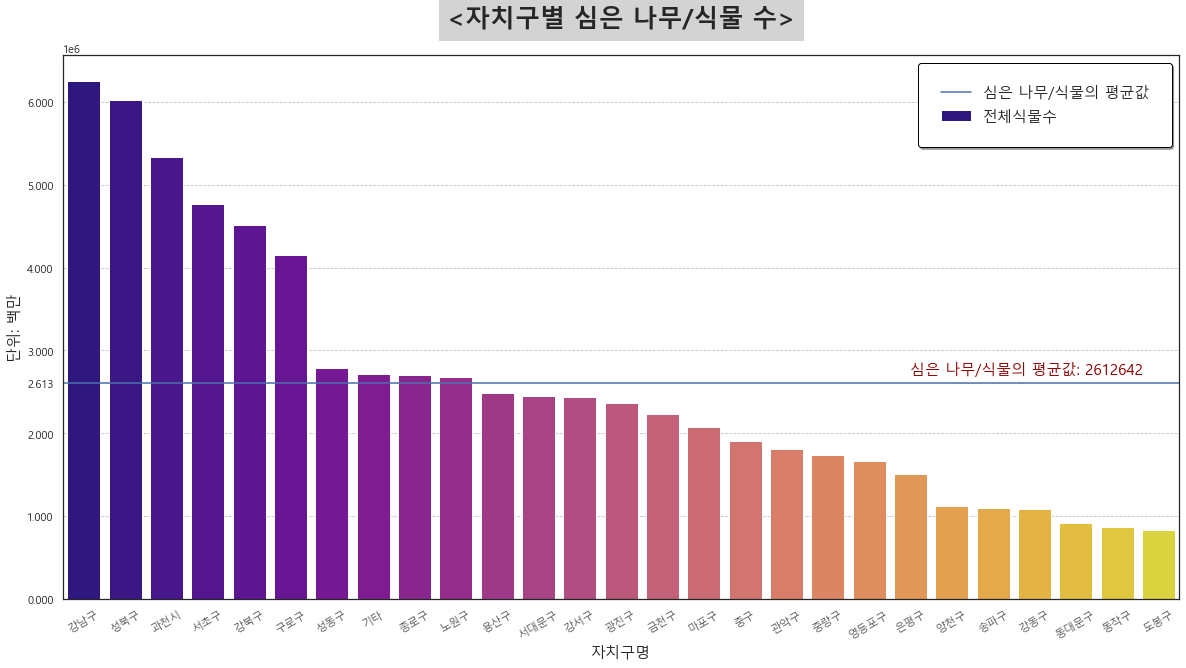

In [143]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
fig,ax = plt.subplots()

seoul_plants_mean = int(seoul_plants_sum['전체 식물합계'].mean())
args_plot = [seoul_plants_sum.index, seoul_plants_sum['전체 식물합계']]
# config_plot = dict(color='white', linestyle='-',linewidth=2)

sns.barplot(data=seoul_plants_sum, x=seoul_plants_sum.index, y='전체 식물합계', label='전체식물수', ax=ax, palette='plasma')

# ax.plot(label='전체식물수', *args_plot, **config_plot)

ax.axhline(seoul_plants_mean, label='심은 나무/식물의 평균값')
ax.text(20,seoul_plants_mean+100000,"심은 나무/식물의 평균값: {}".format(seoul_plants_mean), fontsize=15, color='darkred')
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
yticks.append(seoul_plants_mean)
yticks = sorted(yticks)

ax.set_yticks(yticks)
ax.set_ylim(ylim)
ax.yaxis.grid(linewidth=0.8, color='silver', linestyle='--')
plt.xticks(rotation=30, color='#565656')
plt.ylabel("단위: 백만",fontsize=15)
plt.xlabel("자치구명",fontsize=15)
plt.title("<자치구별 심은 나무/식물 수>", backgroundcolor='lightgrey', loc='center',pad=30, fontsize=25, fontweight='bold')
plt.legend(loc='upper right', fontsize=15, borderpad=1.5, fancybox=True, shadow=True,edgecolor='black', facecolor='white')
plt.savefig("자치구별_심은_식물_수.png")
plt.show()

In [145]:
# 서울시 신재생에너지 생산량 통계

newable_energy_production = pd.read_excel("서울시_신재생에너지_생산량_통계.xlsx", thousands=',')                                     
newable_energy_production
# # 첫번째 행을 column으로 지정 --> rename 함수를 이용하고 columns는 iloc 함수를 이용하여 몇번째 행인지 작성
# newable_energy_production = newable_energy_production.rename(columns=newable_energy_production.iloc[0])
# # column과 첫번째 행이 중복 되었으므로 첫번째 행(index[0])은 삭제해줌. (+구분 column도)
# newable_energy_production = newable_energy_production.drop(newable_energy_production.index[0])
# newable_energy_production = newable_energy_production.drop(columns=['구분'])
# newable_energy_production

,기간,구분,신재생에너지 생산량,신재생에너지 생산량.1,신재생에너지 생산량.2,신재생에너지 생산량.3,신재생에너지 생산량.4,신재생에너지 생산량.5,신재생에너지 생산량.6,신재생에너지 생산량.7,신재생에너지 생산량.8
0,기간,구분,합계,태양열,태양광,바이오,풍력,연료전지,폐기물,지열,수력
1,2011,구분,255549,1333,4462,40255,38,5580,200111,3770,-
2,2012,구분,232626,1109,5804,36658,41,6333,177549,5132,-
3,2013,구분,238239,1076,7011,46236,41,5263,172422,6191,-
4,2014,구분,293656,1043,11813,98477,41,11949,162844,7250,240
5,2015,구분,335139,976,16676,94097,43,36965,177290,8790,301
6,2016,구분,316806,920,19355,79517,43,38137,168614,9906,315
7,2017,구분,350880,836,23663,77003,46,69689,168115,11270,258
8,2018,구분,381546,775,29072,97562,48,68432,172088,13334,236
9,2019,구분,350326,705,34320,96475,44,59919,143488,15002,373


In [79]:
# 첫번째 행을 column으로 지정 
newable_energy_production = newable_energy_production.rename(
    columns=newable_energy_production.iloc[0])
# column과 첫번째 행이 중복 되었으므로 첫번째 행 삭제
newable_energy_production = newable_energy_production.drop(
    newable_energy_production.index[0])
newable_energy_production = newable_energy_production.drop(
    columns=['구분'])
newable_energy_production.head(4)

,기간,합계,태양열,태양광,바이오,풍력,연료전지,폐기물,지열,수력
1,2011,255549,1333,4462,40255,38,5580,200111,3770,-
2,2012,232626,1109,5804,36658,41,6333,177549,5132,-
3,2013,238239,1076,7011,46236,41,5263,172422,6191,-
4,2014,293656,1043,11813,98477,41,11949,162844,7250,240


In [74]:
# 기간을 index로 지정
newable_energy_production = newable_energy_production.set_index('기간')
newable_energy_production

,합계,태양열,태양광,바이오,풍력,연료전지,폐기물,지열,수력
기간,,,,,,,,,
2011,255549,1333,4462,40255,38,5580,200111,3770,-
2012,232626,1109,5804,36658,41,6333,177549,5132,-
2013,238239,1076,7011,46236,41,5263,172422,6191,-
2014,293656,1043,11813,98477,41,11949,162844,7250,240
2015,335139,976,16676,94097,43,36965,177290,8790,301
2016,316806,920,19355,79517,43,38137,168614,9906,315
2017,350880,836,23663,77003,46,69689,168115,11270,258
2018,381546,775,29072,97562,48,68432,172088,13334,236
2019,350326,705,34320,96475,44,59919,143488,15002,373


In [75]:
# 결측치 - 는 0으로 대체
newable_energy_production = newable_energy_production.replace("-",0)
newable_energy_production

,합계,태양열,태양광,바이오,풍력,연료전지,폐기물,지열,수력
기간,,,,,,,,,
2011,255549,1333,4462,40255,38,5580,200111,3770,0
2012,232626,1109,5804,36658,41,6333,177549,5132,0
2013,238239,1076,7011,46236,41,5263,172422,6191,0
2014,293656,1043,11813,98477,41,11949,162844,7250,240
2015,335139,976,16676,94097,43,36965,177290,8790,301
2016,316806,920,19355,79517,43,38137,168614,9906,315
2017,350880,836,23663,77003,46,69689,168115,11270,258
2018,381546,775,29072,97562,48,68432,172088,13334,236
2019,350326,705,34320,96475,44,59919,143488,15002,373


In [76]:
newable_energy_production = newable_energy_production.astype('int')
newable_energy_production.dtypes

합계      int32
태양열     int32
태양광     int32
바이오     int32
풍력      int32
연료전지    int32
폐기물     int32
지열      int32
수력      int32
dtype: object

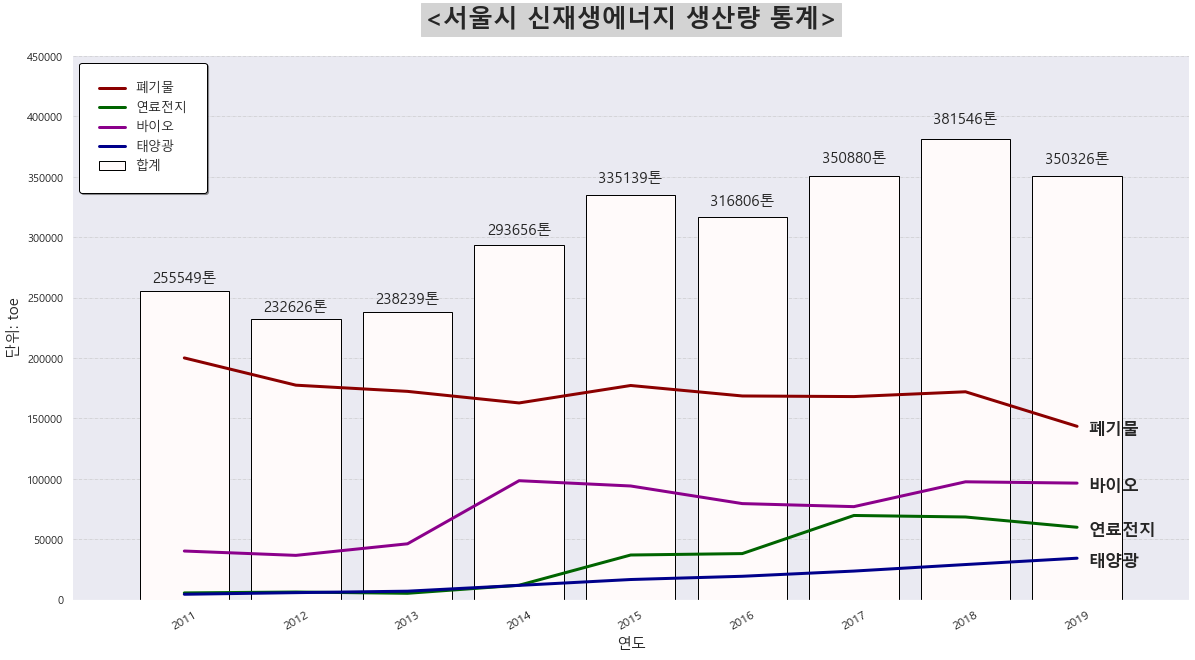

In [160]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='dark')
fig,ax = plt.subplots()

bars = ax.bar(newable_energy_production.index, newable_energy_production['합계'], color='snow', edgecolor='black', label='합계')
ax.plot(newable_energy_production.index, newable_energy_production['폐기물'], color='darkred', linewidth=3, label='폐기물')
ax.plot(newable_energy_production.index, newable_energy_production['연료전지'], color='darkgreen', linewidth=3,label='연료전지')
ax.plot(newable_energy_production.index, newable_energy_production['바이오'], color='darkmagenta', linewidth=3,label='바이오')
ax.plot(newable_energy_production.index, newable_energy_production['태양광'], color='darkblue', linewidth=3,label='태양광')

ax.text(newable_energy_production.index[-1]+0.1, newable_energy_production['폐기물'].iloc[-1]-7000, '폐기물', fontsize=17, fontweight='bold')
ax.text(newable_energy_production.index[-1]+0.1, newable_energy_production['연료전지'].iloc[-1]-7000, '연료전지', fontsize=17, fontweight='bold')
ax.text(newable_energy_production.index[-1]+0.1, newable_energy_production['바이오'].iloc[-1]-7000, '바이오', fontsize=17, fontweight='bold')
ax.text(newable_energy_production.index[-1]+0.1, newable_energy_production['태양광'].iloc[-1]-7000, '태양광', fontsize=17, fontweight='bold')


for p in bars.patches:
    
    left,bottom,width,height, = p.get_bbox().bounds
    ax.annotate("%d톤"%(height), (left+width/2, height*1.04), ha='center', va='center', fontsize=15)

ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="-.")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend(loc='upper left', fontsize=13, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel("연도", fontsize=15)
plt.ylabel("단위: toe", fontsize=15)
plt.xlim(2010,2020)
plt.xticks(newable_energy_production.index, fontsize=12,rotation=30)
plt.title("<서울시 신재생에너지 생산량 통계>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.savefig("서울시_신재생에너지_생산량_통계.png")
plt.show()

#* 단위 toe(Tonnage of Oil Equivalent)는 각종 에너지의 열량을 석유 1톤당 열량값인 1,000만kcal로 환산한 것임

In [165]:
# 신재생에너지 발전량과 발전비율
power_generation_rate = pd.read_csv("신재생에너지_발전량과_발전비율.csv", encoding='cp949', thousands=",")
power_generation_rate 


,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,총발전량(GWh),501527.00,532191.00,543098.00,546249.00,560974.00,561826.00,577331.00,593639.00,587981.00
1,신·재생에너지?발전량(GWh),17346.00,19498.00,21438.00,26882.00,37079.00,40656.00,46623.00,52718.00,33029.00
2,신·재생에너지?발전비율(%),3.46,3.66,3.95,4.92,6.61,7.24,8.08,8.88,5.62


In [166]:
# column명 변경
power_generation_rate = power_generation_rate.rename(columns={'Unnamed: 0':"연도"})
power_generation_rate

,연도,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,총발전량(GWh),501527.00,532191.00,543098.00,546249.00,560974.00,561826.00,577331.00,593639.00,587981.00
1,신·재생에너지?발전량(GWh),17346.00,19498.00,21438.00,26882.00,37079.00,40656.00,46623.00,52718.00,33029.00
2,신·재생에너지?발전비율(%),3.46,3.66,3.95,4.92,6.61,7.24,8.08,8.88,5.62


In [167]:
# 열과 행 변경
power_generation_rate = power_generation_rate.transpose()
power_generation_rate

,0,1,2
연도,총발전량(GWh),신·재생에너지?발전량(GWh),신·재생에너지?발전비율(%)
2011,501527.0,17346.0,3.46
2012,532191.0,19498.0,3.66
2013,543098.0,21438.0,3.95
2014,546249.0,26882.0,4.92
2015,560974.0,37079.0,6.61
2016,561826.0,40656.0,7.24
2017,577331.0,46623.0,8.08
2018,593639.0,52718.0,8.88
2019,587981.0,33029.0,5.62


In [168]:
# 첫번째 행을 column으로 지정
power_generation_rate = power_generation_rate.rename(columns=power_generation_rate.iloc[0])
power_generation_rate

,총발전량(GWh),신·재생에너지?발전량(GWh),신·재생에너지?발전비율(%)
연도,총발전량(GWh),신·재생에너지?발전량(GWh),신·재생에너지?발전비율(%)
2011,501527.0,17346.0,3.46
2012,532191.0,19498.0,3.66
2013,543098.0,21438.0,3.95
2014,546249.0,26882.0,4.92
2015,560974.0,37079.0,6.61
2016,561826.0,40656.0,7.24
2017,577331.0,46623.0,8.08
2018,593639.0,52718.0,8.88
2019,587981.0,33029.0,5.62


In [169]:
# 0번째 인덱스 삭제 (중복되므로)
power_generation_rate = power_generation_rate.drop(power_generation_rate.index[0])
power_generation_rate

,총발전량(GWh),신·재생에너지?발전량(GWh),신·재생에너지?발전비율(%)
2011,501527.0,17346.0,3.46
2012,532191.0,19498.0,3.66
2013,543098.0,21438.0,3.95
2014,546249.0,26882.0,4.92
2015,560974.0,37079.0,6.61
2016,561826.0,40656.0,7.24
2017,577331.0,46623.0,8.08
2018,593639.0,52718.0,8.88
2019,587981.0,33029.0,5.62


In [170]:
power_generation_rate = power_generation_rate.reset_index()
power_generation_rate = power_generation_rate.rename(columns={'index':'연도'})
power_generation_rate = power_generation_rate.set_index('연도', inplace=False)
power_generation_rate 

,총발전량(GWh),신·재생에너지?발전량(GWh),신·재생에너지?발전비율(%)
연도,,,
2011,501527.0,17346.0,3.46
2012,532191.0,19498.0,3.66
2013,543098.0,21438.0,3.95
2014,546249.0,26882.0,4.92
2015,560974.0,37079.0,6.61
2016,561826.0,40656.0,7.24
2017,577331.0,46623.0,8.08
2018,593639.0,52718.0,8.88
2019,587981.0,33029.0,5.62


In [171]:
power_generation_rate = power_generation_rate.rename(
    columns={'신·재생에너지?발전량(GWh)':'신재생에너지 발전량(GWh)', "신·재생에너지?발전비율(%)":'신재생에너지_발전비율(%)'})
power_generation_rate

,총발전량(GWh),신재생에너지 발전량(GWh),신재생에너지_발전비율(%)
연도,,,
2011,501527.0,17346.0,3.46
2012,532191.0,19498.0,3.66
2013,543098.0,21438.0,3.95
2014,546249.0,26882.0,4.92
2015,560974.0,37079.0,6.61
2016,561826.0,40656.0,7.24
2017,577331.0,46623.0,8.08
2018,593639.0,52718.0,8.88
2019,587981.0,33029.0,5.62


In [172]:
power_generation_rate['총발전량(GWh)'] = power_generation_rate['총발전량(GWh)'].astype('int')
power_generation_rate['신재생에너지 발전량(GWh)'] = power_generation_rate['신재생에너지 발전량(GWh)'].astype('int')
power_generation_rate['신재생에너지_발전비율(%)'] = power_generation_rate['신재생에너지_발전비율(%)'].astype('float')
power_generation_rate.dtypes

총발전량(GWh)            int32
신재생에너지 발전량(GWh)      int32
신재생에너지_발전비율(%)     float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

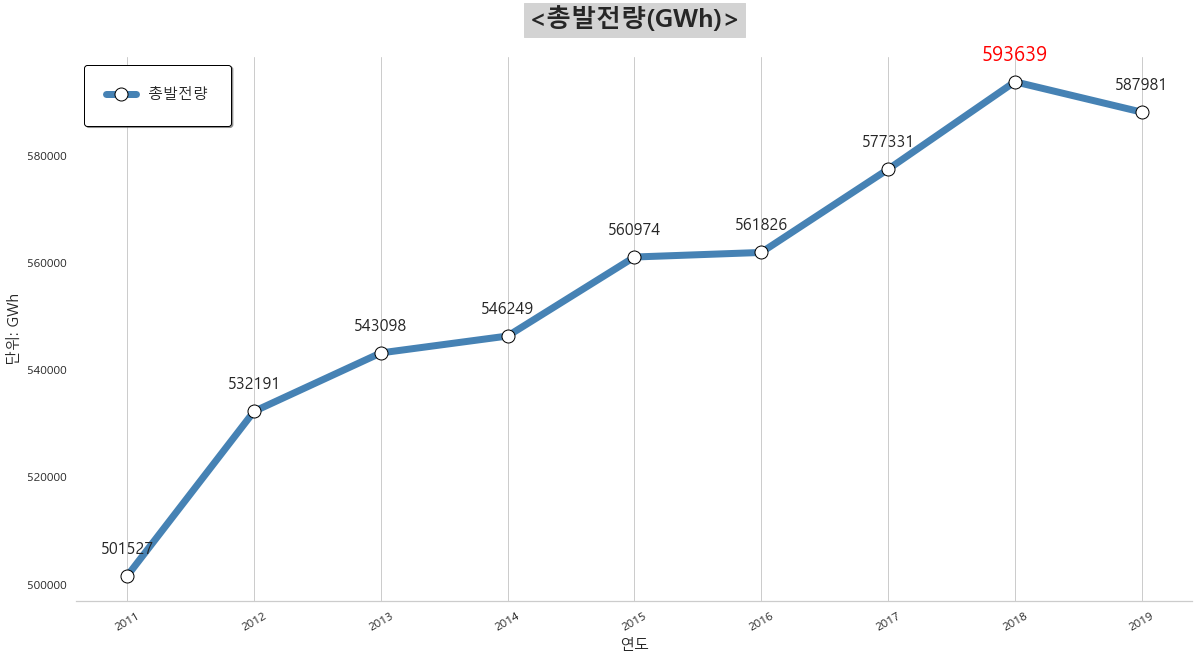

In [173]:

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='whitegrid')
fig,ax = plt.subplots()

# ax.bar(power_generation_rate.index, power_generation_rate['신재생에너지 발전량(GWh)'], color='red')
lines = ax.plot(power_generation_rate.index, power_generation_rate['총발전량(GWh)'], marker="o", markersize=13,
        markeredgecolor='black',markerfacecolor='white', linewidth=7, color='steelblue', label='총발전량')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

max_value = max(power_generation_rate['총발전량(GWh)'])
for data in range(len(power_generation_rate)):
    
    if max(power_generation_rate['총발전량(GWh)']) == power_generation_rate['총발전량(GWh)'][data]:
        ax.text(power_generation_rate.index[data],power_generation_rate['총발전량(GWh)'][data]+5000,
            power_generation_rate['총발전량(GWh)'][data], fontsize=20, color='red', ha='center', va='center')
    
    else:
        ax.text(power_generation_rate.index[data], power_generation_rate['총발전량(GWh)'][data]+5000,
            power_generation_rate['총발전량(GWh)'][data], fontsize=16, ha='center', va='center')
    


ax.yaxis.grid(linewidth=0.5, color='black', linestyle=":")
plt.title("<총발전량(GWh)>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper left', fontsize=15, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: GWh", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("총발전량.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

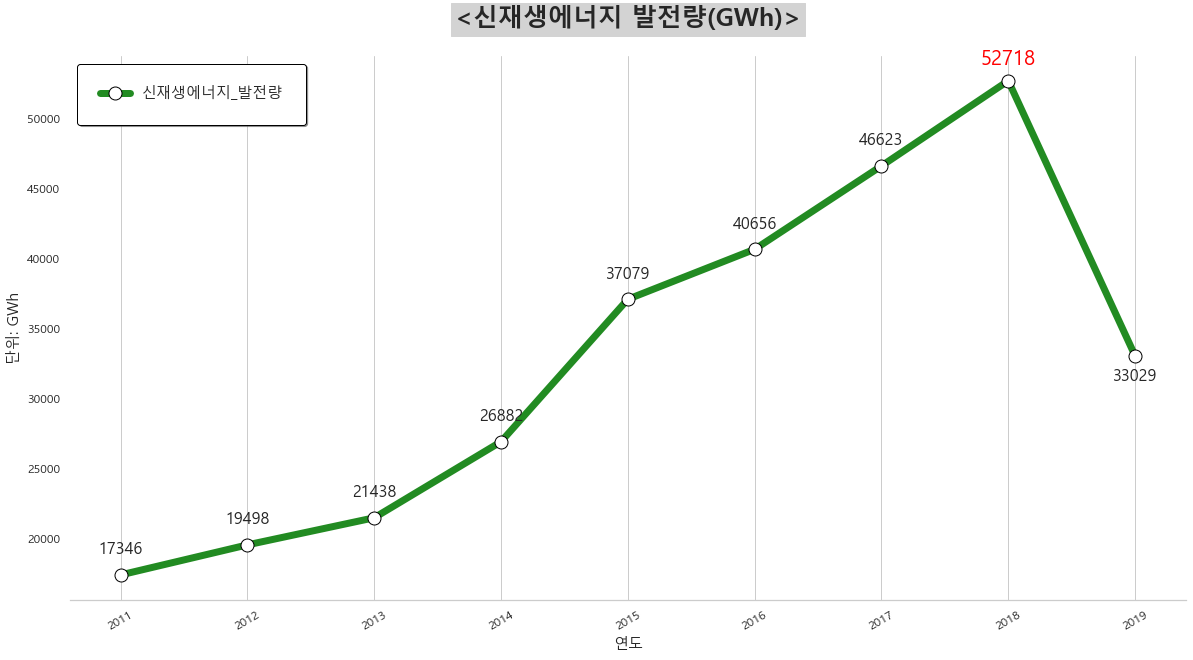

In [175]:

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='whitegrid')
fig,ax = plt.subplots()

# ax.bar(power_generation_rate.index, power_generation_rate['신재생에너지 발전량(GWh)'], color='red')
lines = ax.plot(power_generation_rate.index, power_generation_rate['신재생에너지 발전량(GWh)'], marker="o", markersize=13,
        markeredgecolor='black',markerfacecolor='white', linewidth=7, color='forestgreen', label='신재생에너지_발전량')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)


for data in range(len(power_generation_rate)):
    
    if max(power_generation_rate['신재생에너지 발전량(GWh)']) == power_generation_rate['신재생에너지 발전량(GWh)'][data]:
        ax.text(power_generation_rate.index[data],power_generation_rate['신재생에너지 발전량(GWh)'][data]+1500,
            power_generation_rate['신재생에너지 발전량(GWh)'][data], fontsize=20, color='red', ha='center', va='center')
        
    elif power_generation_rate['신재생에너지 발전량(GWh)'][-1] == power_generation_rate['신재생에너지 발전량(GWh)'][data]:
        ax.text(power_generation_rate.index[data], power_generation_rate['신재생에너지 발전량(GWh)'][data]-1500,
            power_generation_rate['신재생에너지 발전량(GWh)'][data], fontsize=16, ha='center', va='center')
    
    else:
        ax.text(power_generation_rate.index[data], power_generation_rate['신재생에너지 발전량(GWh)'][data]+1800,
            power_generation_rate['신재생에너지 발전량(GWh)'][data], fontsize=16, ha='center', va='center')
    


ax.yaxis.grid(linewidth=0.5, color='black', linestyle=":")
plt.title("<신재생에너지 발전량(GWh)>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper left', fontsize=15, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: GWh", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("신재생에너지 발전량(GWh).png")
plt.show

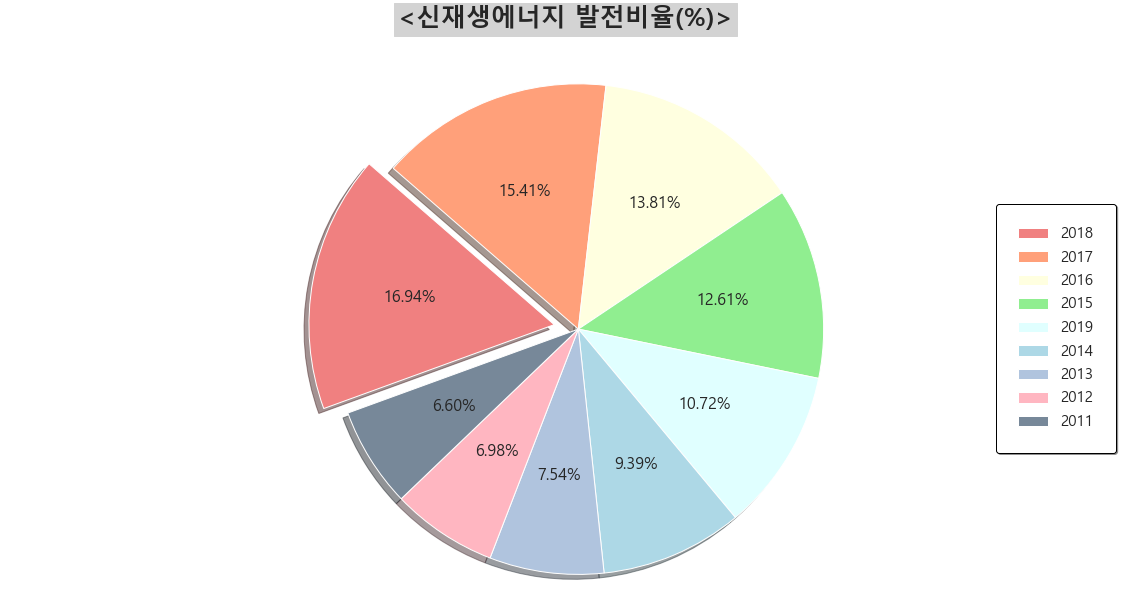

In [176]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='whitegrid')
power_generation_rate = power_generation_rate.sort_values(by='신재생에너지_발전비율(%)', ascending=False)
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0]
colors = ['lightcoral', 'lightsalmon','lightyellow', 'lightgreen', 'lightcyan', 'lightblue', 'lightsteelblue', 'lightpink','lightslategrey']
plt.pie(power_generation_rate['신재생에너지_발전비율(%)'], autopct='%1.2f%%', startangle=-160, counterclock=False,
       explode=explode, shadow=True, colors=colors, textprops={'fontsize':16})
plt.axis("equal")
plt.legend(power_generation_rate.index, loc='right', shadow=True, fancybox=True, borderpad=1.5, fontsize=15,
           edgecolor='black', facecolor='white')
plt.title("<신재생에너지 발전비율(%)>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.savefig("신재생에너지_발전비율(%).png")
plt.show()

In [177]:
# 서울시 신재생에너지 허가 및 사업개시
seoul_newableEnergy_permission = pd.read_csv("서울시 신재생에너지 허가 및 사업개시.csv", encoding='cp949')


In [178]:
# 가동여부 == 가동중인 것만 확인
# all 가동중인 상태임을 확인함.

for i in seoul_newableEnergy_permission['가동여부']:
    if i == '가동중':
        seoul_newableEnergy_permission['가동여부'] = i
    elif i != '가동중':
        print("가동중이 아닙니다.")
        

In [179]:
seoul_newableEnergy_permission['에너지원'].value_counts()   # 바이오가스, 소수력, 연료전지, 태양광


태양광      302
소수력        5
연료전지       1
바이오가스      1
Name: 에너지원, dtype: int64

In [180]:
# 발전소 주소를 '~구'까지만 저장
add_list = []
seoul_newableEnergy_permission_new = pd.DataFrame()
for data in seoul_newableEnergy_permission['발전소 주소']:
    add_list.append(data.split(" ")[1])
seoul_newableEnergy_permission_new['발전소_주소_구'] = add_list


In [181]:
# 지역구와 발전소 개수 저장
# 중복 제거함
seoul_address = pd.DataFrame()
seoul_address['발전소_개수'] = seoul_newableEnergy_permission_new['발전소_주소_구'].value_counts()


In [182]:
# 새로운 인덱스 세팅
# 인덱스를 초기화 시킴
seoul_address.reset_index(inplace=True)

In [183]:
# column명 변경
seoul_address.rename(columns={'index':'서울시_지역구'},inplace=True) 
seoul_address

,서울시_지역구,발전소_개수
0,광진구,23
1,강서구,22
2,성북구,19
3,관악구,15
4,강남구,15
5,노원구,15
6,도봉구,15
7,송파구,15
8,강동구,15
9,은평구,15


In [184]:
# 지역구들만 address에 따로 저장
# 위도,경도를 찾기 위함
address = seoul_address['서울시_지역구']


In [185]:
# 위도,경도의 좌표값을 얻기 위해 필요한 라이브러리 (geo coding)

from geopy.geocoders import Nominatim

# geo coding을 위해 사용하는 Nominatim 서비스
# user_agent ==> 한글 주소를 지오코딩 한다는 의미

local = Nominatim(user_agent='South Korea')

# 위도 반환 함수
# 위도 값들만 리스트로 받아와서 반환

def get_latitude(address):
    x_location = local.geocode(address)
    x_location_list = [x_location.latitude]
    return x_location_list

# 경도 반환 함수
# 경도 값들만 리스트로 받아와서 반환

def get_longitude(address):
    y_location = local.geocode(address)
    y_location_list = [y_location.longitude]
    return y_location_list

latitude = []
longitude = []

# 위도, 경도 변수에 각각 값 넣어주기

for i in address:
    latitude.append(get_latitude(i)[0])
    longitude.append(get_longitude(i)[0])

In [186]:
# seoul_address DF에 위도,경도 추가

seoul_address['위도'] = latitude
seoul_address['경도'] = longitude
seoul_address

,서울시_지역구,발전소_개수,위도,경도
0,광진구,23,37.538400,127.082800
1,강서구,22,37.550900,126.849700
2,성북구,19,37.590000,127.016500
3,관악구,15,37.478200,126.951800
4,강남구,15,37.517700,127.047300
5,노원구,15,37.654000,127.056700
6,도봉구,15,37.668600,127.046600
7,송파구,15,37.514500,127.105800
8,강동구,15,37.530000,127.123700
9,은평구,15,37.602400,126.929300


In [187]:
import folium

In [188]:
# 출처 https://github.com/southkorea/seoul-maps
geo_simple_path = 'seoul_municipalities_geo_simple.json'

In [52]:
# json 사용법
# 이름/값 쌍의 집합과 정렬된 값의 리스트로 이루어져 있음

In [53]:
# # json 라이브러리 및 open
# import json

# with open(geo_simple_path, encoding = 'utf-8') as json_file:
#     json_data = json.load(json_file)
    
# print(json.dumps(json_data, indent = '\t')) 
# # json.dump() : 파이썬 객체를 json 파일로 저장하는 함수
# # json.dumps() : file 대신 string으로 직렬화
# # indent ==> 들여 쓰기

In [189]:
import geopandas as gpd

In [190]:
geometry_file = gpd.read_file('seoul_municipalities_geo_simple.json')
geometry_file

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.05182 37.68582, 127.05195 37.682..."
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95844 37.62947, 126.95640 37.628..."
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606..."
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95662 37.51528, 126.95731 37.514..."
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.88105 37.48568, 126.88137 37.485..."
5,11530,구로구,Guro-gu,5,0.002047,0.347568,"POLYGON ((126.87951 37.51778, 126.88272 37.515..."
6,11110,종로구,Jongno-gu,6,0.002448,0.290100,"POLYGON ((126.97638 37.62910, 126.97664 37.629..."
7,11305,강북구,Gangbuk-gu,7,0.002412,0.267441,"POLYGON ((127.00868 37.68440, 127.00844 37.683..."
8,11260,중랑구,Jungnang-gu,8,0.001893,0.184716,"POLYGON ((127.10091 37.57377, 127.09949 37.572..."
9,11680,강남구,Gangnam-gu,9,0.004027,0.348412,"POLYGON ((127.03981 37.53583, 127.04604 37.534..."


In [191]:
geometry_file = geometry_file.sort_values(by='SIG_KOR_NM', ascending=True)
seoul_address

,서울시_지역구,발전소_개수,위도,경도
0,광진구,23,37.538400,127.082800
1,강서구,22,37.550900,126.849700
2,성북구,19,37.590000,127.016500
3,관악구,15,37.478200,126.951800
4,강남구,15,37.517700,127.047300
5,노원구,15,37.654000,127.056700
6,도봉구,15,37.668600,127.046600
7,송파구,15,37.514500,127.105800
8,강동구,15,37.530000,127.123700
9,은평구,15,37.602400,126.929300


In [192]:
power_plant_cnt = seoul_address.drop(columns=['위도','경도'])

In [193]:
power_plant_cnt = power_plant_cnt.rename({'서울시_지역구':'SIG_KOR_NM'}, axis='columns')
power_plant_cnt['label'] = power_plant_cnt['SIG_KOR_NM'].map(str)+"\n" + 
                            power_plant_cnt['발전소_개수'].map(str)+"개"
power_plant_cnt

,SIG_KOR_NM,발전소_개수,label
0,광진구,23,광진구\n23개
1,강서구,22,강서구\n22개
2,성북구,19,성북구\n19개
3,관악구,15,관악구\n15개
4,강남구,15,강남구\n15개
5,노원구,15,노원구\n15개
6,도봉구,15,도봉구\n15개
7,송파구,15,송파구\n15개
8,강동구,15,강동구\n15개
9,은평구,15,은평구\n15개


In [194]:
geometry_new_file = pd.merge(geometry_file, power_plant_cnt,on='SIG_KOR_NM')  
geometry_new_file

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,발전소_개수,label
0,11680,강남구,Gangnam-gu,9,0.004027,0.348412,"POLYGON ((127.03981 37.53583, 127.04604 37.534...",15,강남구\n15개
1,11740,강동구,Gangdong-gu,12,0.002504,0.242596,"POLYGON ((127.14511 37.51684, 127.14385 37.517...",15,강동구\n15개
2,11305,강북구,Gangbuk-gu,7,0.002412,0.267441,"POLYGON ((127.00868 37.68440, 127.00844 37.683...",12,강북구\n12개
3,11500,강서구,Gangseo-gu,10,0.004227,0.435694,"POLYGON ((126.85365 37.57180, 126.85609 37.569...",22,강서구\n22개
4,11620,관악구,Gwanak-gu,15,0.003012,0.280092,"POLYGON ((126.92849 37.49483, 126.92851 37.494...",15,관악구\n15개
5,11215,광진구,Gwangjin-gu,13,0.001737,0.186732,"POLYGON ((127.11527 37.55676, 127.11411 37.554...",23,광진구\n23개
6,11530,구로구,Guro-gu,5,0.002047,0.347568,"POLYGON ((126.87951 37.51778, 126.88272 37.515...",13,구로구\n13개
7,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.88105 37.48568, 126.88137 37.485...",12,금천구\n12개
8,11350,노원구,Nowon-gu,18,0.003640,0.309723,"POLYGON ((127.10557 37.62038, 127.10171 37.620...",15,노원구\n15개
9,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.05182 37.68582, 127.05195 37.682...",15,도봉구\n15개


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24],
           dtype='int64')


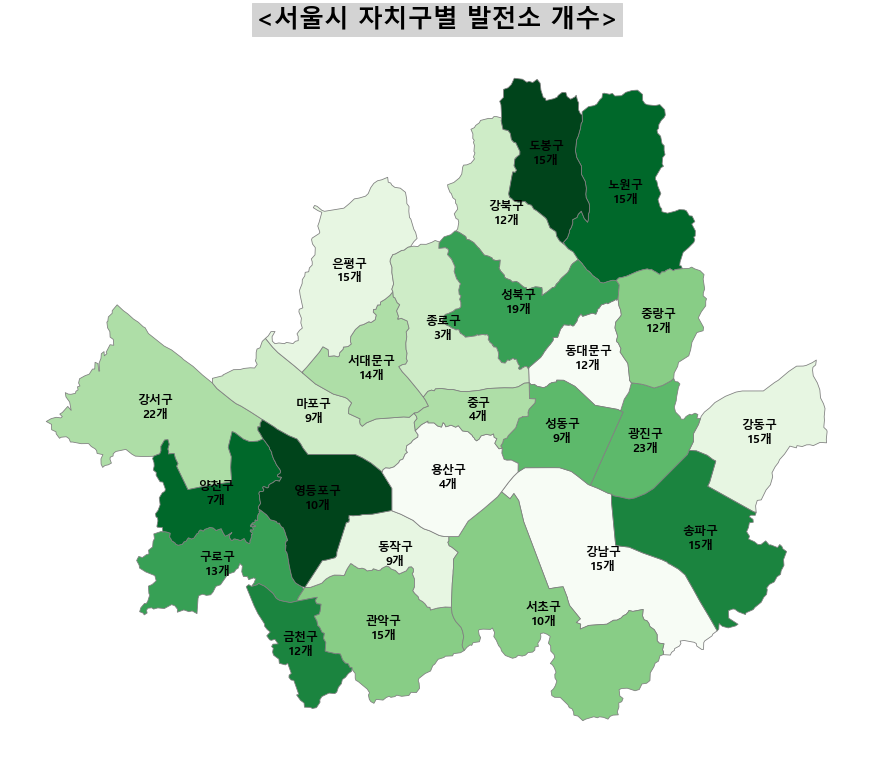

In [227]:

map_fig = geometry_new_file.plot(figsize=(20,13), edgecolor = "grey", linewidth=0.8,  cmap=plt.cm.get_cmap('Greens',10))
# get_cmap : plt.cm에 있는 칼라맵을 넘겨줄 때 사용.

plt.title("<서울시 자치구별 발전소 개수>", font='Malgun Gothic',pad=20, fontsize=25, fontweight='bold',
          color='black',backgroundcolor='lightgrey' )

max_power_plant = max(geometry_new_file['발전소_개수'])
print(geometry_new_file['SIG_KOR_NM'].index)

for index,row in geometry_new_file.iterrows():
# 모든 행을 반복 접근함

    # 다각형의 중심을 찾는 방법
    # centroid.coords()
  
    xy = row['geometry'].centroid.coords[:]
    xytext = row['geometry'].centroid.coords[:]
    plt.annotate(row['label'],xy=xy[0], xytext=xytext[0], ha='center', va='center', color='black',font='Malgun Gothic', 
                 fontsize=12, fontweight='bold')
    
    plt.axis('off')
  
plt.savefig("서울시_자치구별_발전소_개수.png")
# plt.show()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu',
'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r',
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r',
'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 
'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar',
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r',
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [3]:
recycle_waste_kind = pd.read_csv("허가_및_신고업체_재활용_현황_폐기물종류별.csv", encoding='cp949')
recycle_waste_kind

,시점,사업장일반폐기물,사업장일반폐기물.1,사업장일반폐기물.2,사업장일반폐기물.3,사업장일반폐기물.4,사업장일반폐기물.5,사업장일반폐기물.6,사업장일반폐기물.7,지정폐기물,...,지정폐기물.6,지정폐기물.7,생활폐기물,생활폐기물.1,생활폐기물.2,생활폐기물.3,생활폐기물.4,생활폐기물.5,생활폐기물.6,생활폐기물.7
0,시점,허가업체,허가업체,허가업체,허가업체,신고업체,신고업체,신고업체,신고업체,허가업체,...,신고업체,신고업체,허가업체,허가업체,허가업체,허가업체,신고업체,신고업체,신고업체,신고업체
1,시점,가동업체수 (개),재활용폐기물량 (톤/년),재활용제품판매량 (톤/년),판매액 (천원),가동업체수 (개),재활용폐기물량 (톤/년),재활용제품판매량 (톤/년),판매액 (천원),가동업체수 (개),...,재활용제품판매량 (톤/년),판매액 (천원),가동업체수 (개),재활용폐기물량 (톤/년),재활용제품판매량 (톤/년),판매액 (천원),가동업체수 (개),재활용폐기물량 (톤/년),재활용제품판매량 (톤/년),판매액 (천원)
2,2017,3385,47306984,20072585,3199177634,1207,8109459,6353861,1920073953,432,...,1690,2893780,18,193552,116580,7839961,413,3660520,3131503,166685879
3,2018,3737,48156567,39591508,4864022674,1337,9669848,6694545,2077984344,472,...,8392,4426034,44,448149,171511,71397845,360,1152360,1254866,234558829
4,2019,4125,54894504,52353670,5745262834,1469,7237057,6122633,1764740157,512,...,8116,5520447,68,630266,378243,94656560,360,1786282,1732518,377962499


In [4]:
recycle_waste_kind.columns   # 사업장, 지정, 생활폐기물
recycle_waste_kind.values    
# 허가업체,신고업체, 가동업체수(개), 재활용폐기물량(톤/년), 재활용제품판매량(톤/년). 판매액(천원)

array([['시점', '허가업체', '허가업체', '허가업체', '허가업체', '신고업체', '신고업체', '신고업체',
        '신고업체', '허가업체', '허가업체', '허가업체', '허가업체', '신고업체', '신고업체', '신고업체',
        '신고업체', '허가업체', '허가업체', '허가업체', '허가업체', '신고업체', '신고업체', '신고업체',
        '신고업체'],
       ['시점', '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)',
        '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)',
        '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)',
        '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)',
        '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)',
        '가동업체수 (개)', '재활용폐기물량 (톤/년)', '재활용제품판매량 (톤/년)', '판매액 (천원)'],
       ['2017', '3385', '47306984', '20072585', '3199177634', '1207',
        '8109459', '6353861', '1920073953', '432', '3102300', '2437805',
        '1682313519', '17', '8401', '1690', '2893780', '18', '193552',
        '116580', '7839961', '413', '3660520', '3131503', '166685879'],
       ['2018', '3737', '48156567', '39591508', '4864022674', '1337'

In [5]:
# 타입 변환 (object --> int64)
business_waste = business_waste.astype('int64')
business_waste.dtypes
designated_waste = designated_waste.astype('int64')
designated_waste.dtypes
household_waste = household_waste.astype('int64')
household_waste.dtypes

NameError: name 'business_waste' is not defined

In [6]:
processed_companies_cnt = pd.DataFrame({'연도':[2017,2018,2019],
                                        '사업장일반폐기물-(허가)가동업체수(개)':recycle_waste_kind.iloc[2:5,1],
                                        '사업장일반폐기물-(신고)가동업체수(개)':recycle_waste_kind.iloc[2:5,5],
                                        '지정폐기물-(허가)가동업체수(개)':recycle_waste_kind.iloc[2:5,9],
                                        '지정폐기물-(신고)가동업체수(개)':recycle_waste_kind.iloc[2:5,13],
                                        '생활폐기물-(허가)가동업체수(개)':recycle_waste_kind.iloc[2:5,17],
                                        '생활폐기물-(신고)가동업체수(개)':recycle_waste_kind.iloc[2:5,21]})
processed_companies_cnt              

,연도,사업장일반폐기물-(허가)가동업체수(개),사업장일반폐기물-(신고)가동업체수(개),지정폐기물-(허가)가동업체수(개),지정폐기물-(신고)가동업체수(개),생활폐기물-(허가)가동업체수(개),생활폐기물-(신고)가동업체수(개)
2,2017,3385,1207,432,17,18,413
3,2018,3737,1337,472,22,44,360
4,2019,4125,1469,512,23,68,360


In [7]:
processed_companies_cnt = processed_companies_cnt.set_index('연도')
processed_companies_cnt

,사업장일반폐기물-(허가)가동업체수(개),사업장일반폐기물-(신고)가동업체수(개),지정폐기물-(허가)가동업체수(개),지정폐기물-(신고)가동업체수(개),생활폐기물-(허가)가동업체수(개),생활폐기물-(신고)가동업체수(개)
연도,,,,,,
2017,3385,1207,432,17,18,413
2018,3737,1337,472,22,44,360
2019,4125,1469,512,23,68,360


In [8]:
processed_companies_cnt = processed_companies_cnt.astype('int64')
processed_companies_cnt

,사업장일반폐기물-(허가)가동업체수(개),사업장일반폐기물-(신고)가동업체수(개),지정폐기물-(허가)가동업체수(개),지정폐기물-(신고)가동업체수(개),생활폐기물-(허가)가동업체수(개),생활폐기물-(신고)가동업체수(개)
연도,,,,,,
2017,3385,1207,432,17,18,413
2018,3737,1337,472,22,44,360
2019,4125,1469,512,23,68,360


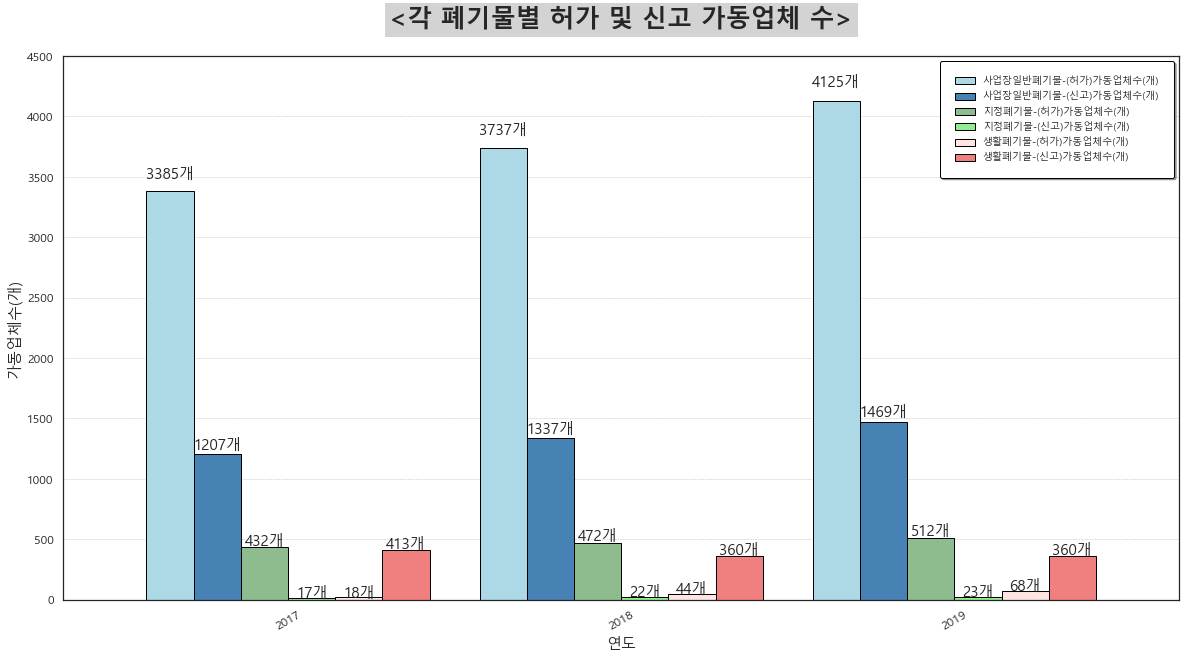

In [9]:
# 각 폐기물별 허가 및 신고 가동업체 수 그래프

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
ax = plt.gca()

bars = processed_companies_cnt.plot(kind='bar', edgecolor='black',ax=ax, width=0.85,
                                    color=['lightblue','steelblue','darkseagreen','lightgreen',
                                                                                 'mistyrose','lightcoral'])

# 바 그래프 위 값 표시

for p in bars.patches:
    left,bottom,width,height = p.get_bbox().bounds
    ax.annotate("%d개"%(height), ((left+width/2), height*1.03), fontsize=15, ha='center', va='baseline')

# y축 눈금선 설정 부분
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="--")

plt.title("<각 폐기물별 허가 및 신고 가동업체 수>", fontsize=25, pad=30, fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper right', fontsize=10, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("가동업체수(개)", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
# plt.savefig("각 폐기물별 허가 및 신고 가동업체 수.png")

plt.show()

In [10]:
# 사업장폐기물
business_waste = pd.DataFrame({'연도':[2017,2018,2019], 
                               '(허가)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,2], 
                               '(허가)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,3],
#                               '(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,4],
                               '(신고)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,6], 
                               '(신고)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,7],
#                               '(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,8]
                              })
business_waste = business_waste.set_index('연도')
business_waste = business_waste.astype('int64')
business_waste

,(허가)재활용폐기물량(톤/년),(허가)재활용제품판매량(톤/년),(신고)재활용폐기물량(톤/년),(신고)재활용제품판매량(톤/년)
연도,,,,
2017,47306984,20072585,8109459,6353861
2018,48156567,39591508,9669848,6694545
2019,54894504,52353670,7237057,6122633


In [11]:
# 지정폐기물
designated_waste = pd.DataFrame({'연도':[2017,2018,2019], 
                               '(허가)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,10], 
                               '(허가)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,11],
#                               '(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,12],
                               '(신고)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,14], 
                               '(신고)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,15],
#                               '(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,16]
                                })
designated_waste = designated_waste.set_index('연도')
designated_waste = designated_waste.astype('int64')
designated_waste

,(허가)재활용폐기물량(톤/년),(허가)재활용제품판매량(톤/년),(신고)재활용폐기물량(톤/년),(신고)재활용제품판매량(톤/년)
연도,,,,
2017,3102300,2437805,8401,1690
2018,3862506,2770997,16821,8392
2019,4244850,3129594,21455,8116


In [12]:
# 생활폐기물
household_waste = pd.DataFrame({'연도':[2017,2018,2019], 
                               '(허가)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,18], 
                               '(허가)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,19],
#                               '(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,20],
                               '(신고)재활용폐기물량(톤/년)':recycle_waste_kind.iloc[2:5,22], 
                               '(신고)재활용제품판매량(톤/년)':recycle_waste_kind.iloc[2:5,23],
#                               '(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,24]
                               })
household_waste = household_waste.set_index('연도')
household_waste = household_waste.astype('int64')
household_waste

,(허가)재활용폐기물량(톤/년),(허가)재활용제품판매량(톤/년),(신고)재활용폐기물량(톤/년),(신고)재활용제품판매량(톤/년)
연도,,,,
2017,193552,116580,3660520,3131503
2018,448149,171511,1152360,1254866
2019,630266,378243,1786282,1732518


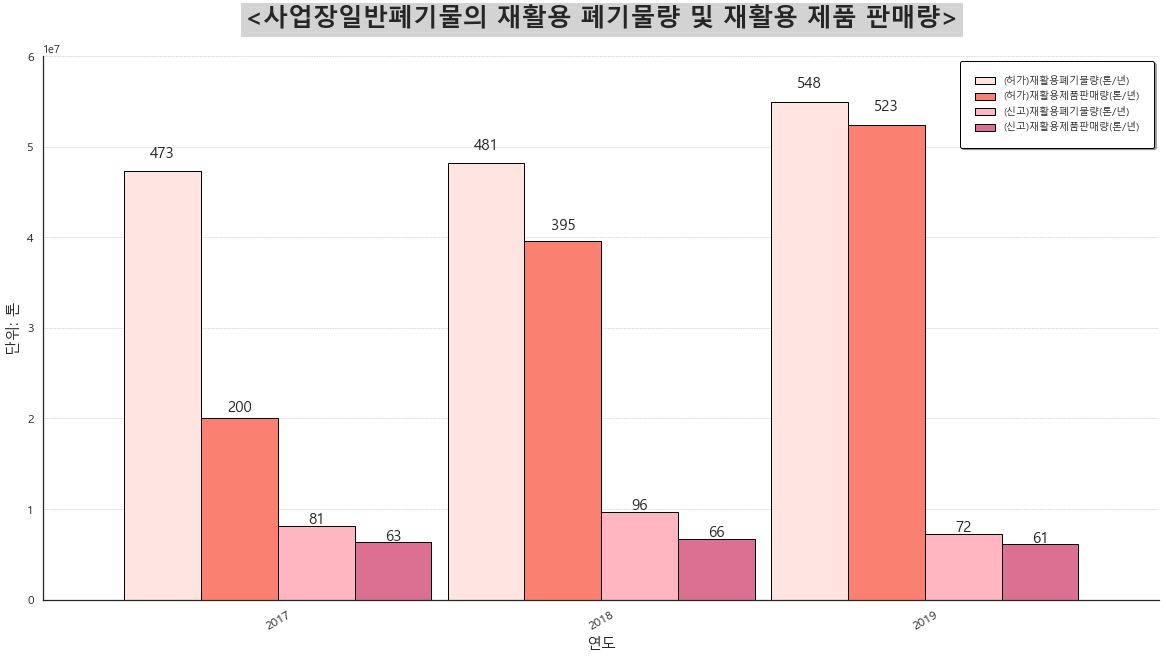

In [75]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
ax = plt.gca()

bars = business_waste.plot(kind='bar',ax=ax, width=0.95, edgecolor='black', color=['mistyrose', 'salmon', 'lightpink', 'palevioletred'])
# 바 그래프 위 값 표시

for p in bars.patches:
    left,bottom,width,height = p.get_bbox().bounds
    ax.annotate("%d"%(height/1e5), ((left+width/2), height*1.03), fontsize=15, ha='center', va='baseline')
    
# y축 눈금선 설정 부분
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="--")    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("<사업장일반폐기물의 재활용 폐기물량 및 재활용 제품 판매량>", fontsize=25, pad=30, 
          fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper right', fontsize=10, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: 톤", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("사업장일반폐기물의 재활용 폐기물량 및 재활용 제품 판매량.png")

plt.show()

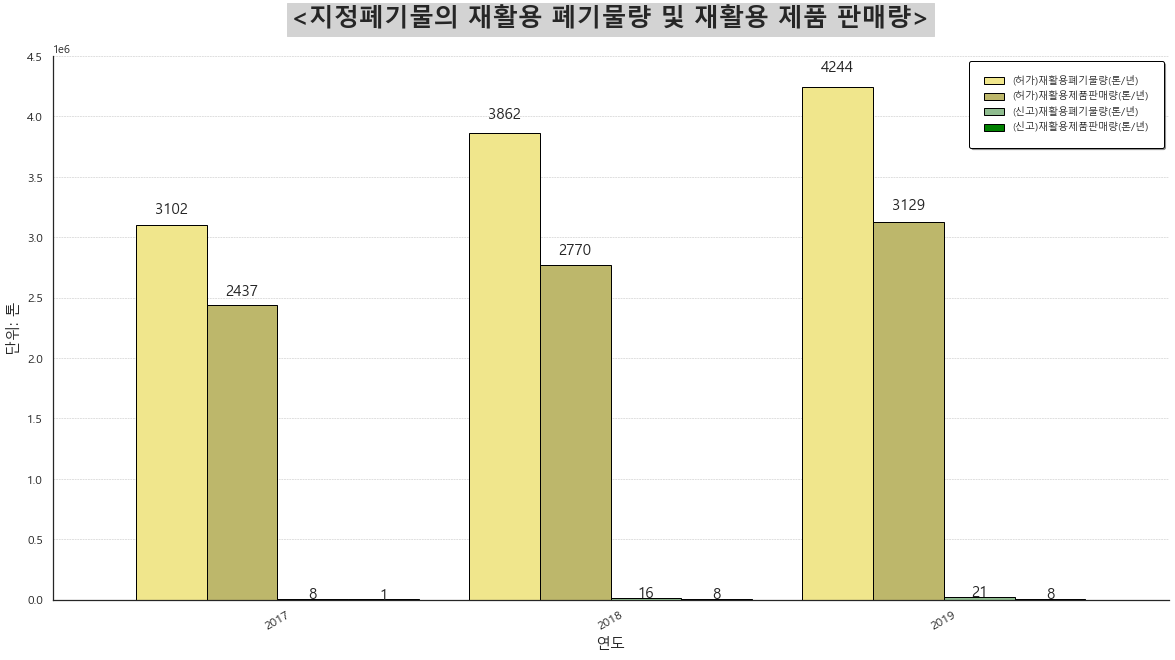

In [74]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
ax = plt.gca()

bars = designated_waste.plot(kind='bar',ax=ax, width=0.85, edgecolor='black', color=['khaki', 'darkkhaki', 'darkseagreen', 'green'])

for p in bars.patches:
    left,bottom,width,height = p.get_bbox().bounds
    ax.annotate("%d"%(height/1e3), ((left+width/2), height*1.03), fontsize=15, ha='center', va='baseline')
    
# y축 눈금선 설정 부분
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="--")    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("<지정폐기물의 재활용 폐기물량 및 재활용 제품 판매량>", fontsize=25, pad=30, 
          fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper right', fontsize=10, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: 톤", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("지정폐기물의 재활용 폐기물량 및 재활용 제품 판매량.png")

plt.show()

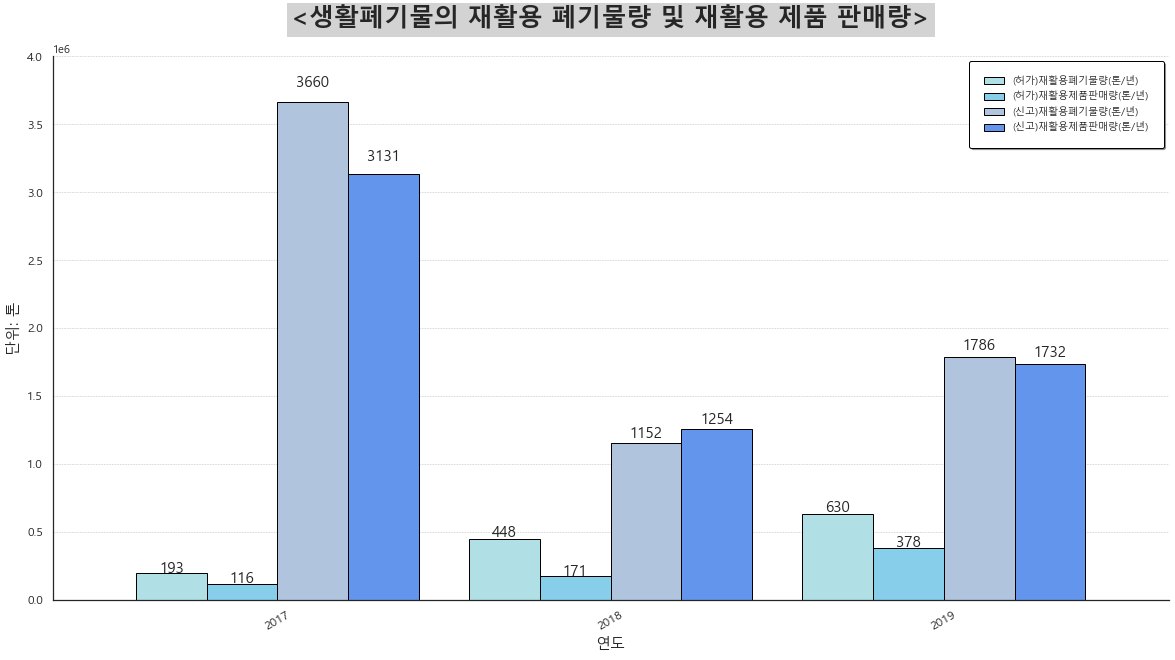

In [73]:
plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
ax = plt.gca()

bars = household_waste.plot(kind='bar',ax=ax, width=0.85, edgecolor='black', color=['powderblue', 'skyblue', 'lightsteelblue', 'cornflowerblue'])

for p in bars.patches:
    left,bottom,width,height = p.get_bbox().bounds
    ax.annotate("%d"%(height/1e3), ((left+width/2), height*1.03), fontsize=15, ha='center', va='baseline')
    
# y축 눈금선 설정 부분
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="--")    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("<생활폐기물의 재활용 폐기물량 및 재활용 제품 판매량>", fontsize=25, pad=30, 
          fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper right', fontsize=10, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: 톤", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("생활폐기물의 재활용 폐기물량 및 재활용 제품 판매량.png")

plt.show()

In [16]:
sales_rate = pd.DataFrame({'연도':[2017,2018,2019],
                           '사업장일반폐기물-(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,4],
                           '사업장일반폐기물-(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,8],
                           '지정폐기물-(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,12],
                           '지정폐기물-(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,16],
                           '생활폐기물-(허가)판매액(천원)':recycle_waste_kind.iloc[2:5,20],
                           '생활폐기물-(신고)판매액(천원)':recycle_waste_kind.iloc[2:5,24]
                               })
sales_rate = sales_rate.set_index('연도')
sales_rate = sales_rate.astype('int64')
sales_rate

,사업장일반폐기물-(허가)판매액(천원),사업장일반폐기물-(신고)판매액(천원),지정폐기물-(허가)판매액(천원),지정폐기물-(신고)판매액(천원),생활폐기물-(허가)판매액(천원),생활폐기물-(신고)판매액(천원)
연도,,,,,,
2017,3199177634,1920073953,1682313519,2893780,7839961,166685879
2018,4864022674,2077984344,1840941820,4426034,71397845,234558829
2019,5745262834,1764740157,2240875964,5520447,94656560,377962499


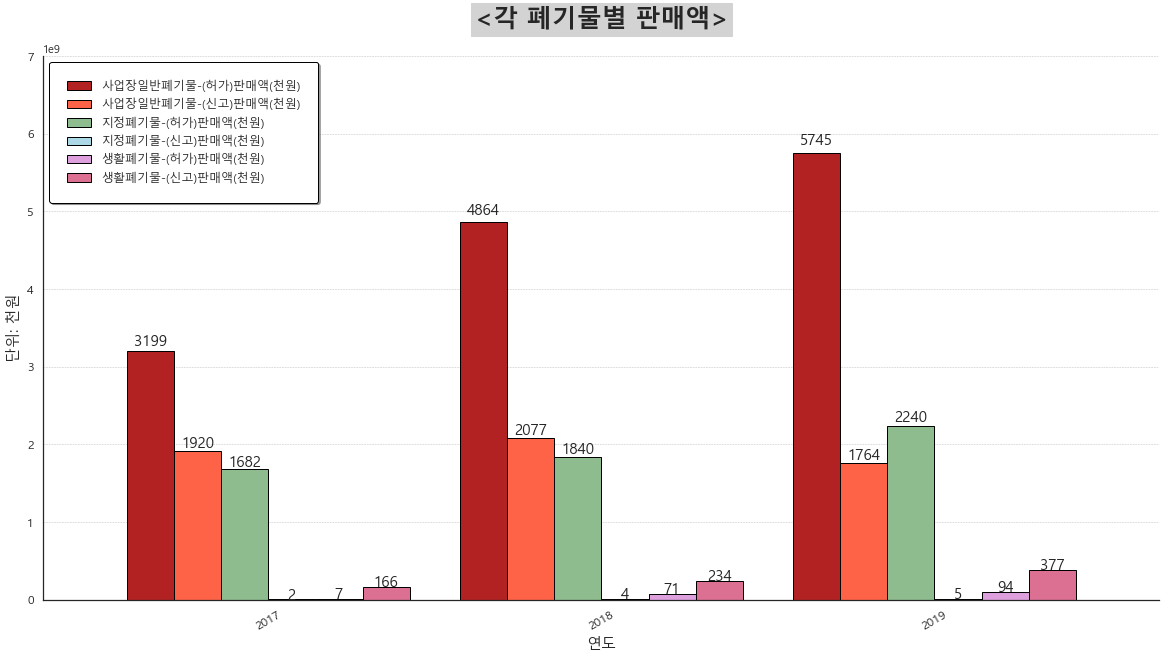

In [85]:
import math

plt.rcParams['figure.figsize']=(20,10)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
ax = plt.gca()
colors = ['firebrick', 'tomato', 'darkseagreen', 'lightblue', 'plum', 'palevioletred']
bars = sales_rate.plot(kind='bar', ax=ax, color=colors, width=0.85, edgecolor='black')

for p in bars.patches:
    left,bottom,width,height = p.get_bbox().bounds
    ax.annotate("%d"%(height/1e6), (left+width/2, height*1.02), ha='center', va='baseline', fontsize=15)

# y축 눈금선 설정 부분
ylim = ax.get_ylim()
yticks = list(ax.get_yticks())
ax.set_ylim(ylim)
ax.set_yticks(yticks)
ax.yaxis.grid(linewidth=0.5, color='silver', linestyle="--")    

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("<각 폐기물별 판매액>", fontsize=25, pad=30, 
          fontweight='bold', backgroundcolor='lightgrey')
plt.legend(loc='upper left', fontsize=12, fancybox=True, shadow=True,borderpad=1.5,edgecolor='black', facecolor='white')
plt.xlabel('연도', fontsize=15)
plt.ylabel("단위: 천원", fontsize=15)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.savefig("각 폐기물별 판매액.png")

plt.show()